<a href="https://colab.research.google.com/github/zohaibmeyo/CropVision-FYP-23035789/blob/main/CropVision_Modelling_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploration

In [ ]:
# Connecting google drive
from google.colab import drive
drive.mount('/content/drive')


# Importing OS
import os
project_path_on_dirve = "/content/drive/MyDrive/fyp-CropVision" # Defining the path of Google Drive to access data
os.chdir(project_path_on_dirve)

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd
import warnings

# ─── Suppress all warning messages to keep output clean ────────────────────────
warnings.filterwarnings("ignore")

# Main folder containing both training and validation data
dataset_main_folder = "dataset"
# Subdirectories within the main folder to process
sub_dirs = ["train", "val"]

# Will accumulate rows of [Plant, Disease, Path]
data_list = []

def process_dataset(directory):
    """
    Walk through each subdirectory of `directory`, parse plant and disease names
    from folder names, and record the full path of each image.
    """
    # Loop over each folder inside the given directory
    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)
        # Only process if it's indeed a folder (not any stray files)
        if os.path.isdir(subdir_path):
            # Folder names are expected in the format "Plant___Disease"
            parts = subdir.split("___")
            # Extract plant name (first part) or default to "Unknown"
            plant = parts[0] if len(parts) > 0 else "Unknown"
            # Extract disease name (second part) or default to "Healthy"
            disease = parts[1] if len(parts) > 1 else "Healthy"

            # Iterate through all image files in this subdirectory
            for img_name in os.listdir(subdir_path):
                img_path = os.path.join(subdir_path, img_name)
                # Append a row: [plant name, disease name, image file path]
                data_list.append([plant, disease, img_path])

# ─── Process both training and validation folders ─────────────────────────────
for sub_dir in sub_dirs:
    dir_path = os.path.join(dataset_main_folder, sub_dir)
    # Only call process_dataset if the directory actually exists
    if os.path.exists(dir_path):
        process_dataset(dir_path)

# ─── Build a pandas DataFrame from the collected data ────────────────────────
data_info = pd.DataFrame(
    data_list,
    columns=["Plant", "Disease", "Path"]  # Column headers: Plant, Disease, and file Path
)

# Display the DataFrame (in a Jupyter notebook; otherwise you can print or save it)
data_info

,Plant,Disease,Path
0,Tomato,Tomato_mosaic_virus,dataset/train/Tomato___Tomato_mosaic_virus/00c...
1,Tomato,Tomato_mosaic_virus,dataset/train/Tomato___Tomato_mosaic_virus/000...
2,Tomato,Tomato_mosaic_virus,dataset/train/Tomato___Tomato_mosaic_virus/01b...
3,Tomato,Tomato_mosaic_virus,dataset/train/Tomato___Tomato_mosaic_virus/006...
4,Tomato,Tomato_mosaic_virus,dataset/train/Tomato___Tomato_mosaic_virus/0d9...
...,...,...,...
54300,Apple,Apple_scab,dataset/val/Apple___Apple_scab/f2d6beb9-e8b1-4...
54301,Apple,Apple_scab,dataset/val/Apple___Apple_scab/c7a9601c-b927-4...
54302,Apple,Apple_scab,dataset/val/Apple___Apple_scab/fcb1ce1e-f60c-4...
54303,Apple,Apple_scab,dataset/val/Apple___Apple_scab/fc9c12dc-1bdb-4...


In [ ]:
# Looking at Descriptive information of dataset.
data_info.describe()

,Plant,Disease,Path
count,54305,54305,54305
unique,14,21,54305
top,Tomato,healthy,dataset/val/Apple___Apple_scab/fcee4ece-01ce-4...
freq,18160,15084,1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use Seaborn’s whitegrid style to make any future plots look clean and readable
sns.set(style="whitegrid")

# -------------------------------------------------------------------------------
# Calculate relative frequencies (percentages) for plants and diseases
# -------------------------------------------------------------------------------

# What percentage of our dataset is made up of each plant species?
plant_counts = data_info["Plant"].value_counts(normalize=True) * 100

# Likewise, what percentage is made up of each disease category?
disease_counts = data_info["Disease"].value_counts(normalize=True) * 100

# Now count the raw number of images for every Plant–Disease pair
plant_disease_counts = (
    data_info
    .groupby(["Plant", "Disease"])
    .size()
    .reset_index(name="Count")
)

# Convert those raw counts into percentages of the total image set
plant_disease_counts["Percentage"] = (
    plant_disease_counts["Count"]
    / plant_disease_counts["Count"].sum()
) * 100


# -------------------------------------------------------------------------------
# Print-Out Key Dataset Statistics for Quick Inspection
# -------------------------------------------------------------------------------

# How many distinct plant types are represented?
print("\nNumber of unique plant species:", data_info["Plant"].nunique())

# How many distinct disease labels do we have?
print("Number of unique diseases:", data_info["Disease"].nunique())

# What’s the total number of images in train + validation?
print("Total number of images:", data_info.shape[0])


# -------------------------------------------------------------------------------
# Detailed Counts by Category
# -------------------------------------------------------------------------------

print("\nImages per plant:")
# Show raw image counts per plant (descending order by default)
print(data_info["Plant"].value_counts())

print("\nImages per disease:")
# Show raw image counts per disease
print(data_info["Disease"].value_counts())

print("\nImages per plant-disease combination:")
# Display a table of raw counts for each Plant/Disease pair
print(data_info.groupby(["Plant", "Disease"]).size())


Number of unique plant species: 14
Number of unique diseases: 21
Total number of images: 54305

Images per plant:
Plant
Tomato                     18160
Orange                      5507
Soybean                     5090
Grape                       4062
Corn_(maize)                3852
Apple                       3171
Peach                       2657
Pepper,_bell                2475
Potato                      2152
Cherry_(including_sour)     1906
Squash                      1835
Strawberry                  1565
Blueberry                   1502
Raspberry                    371
Name: count, dtype: int64

Images per disease:
Disease
healthy                                 15084
Haunglongbing_(Citrus_greening)          5507
Bacterial_spot                           5421
Tomato_Yellow_Leaf_Curl_Virus            5357
Late_blight                              2909
Powdery_mildew                           2887
Early_blight                             2000
Black_rot                               

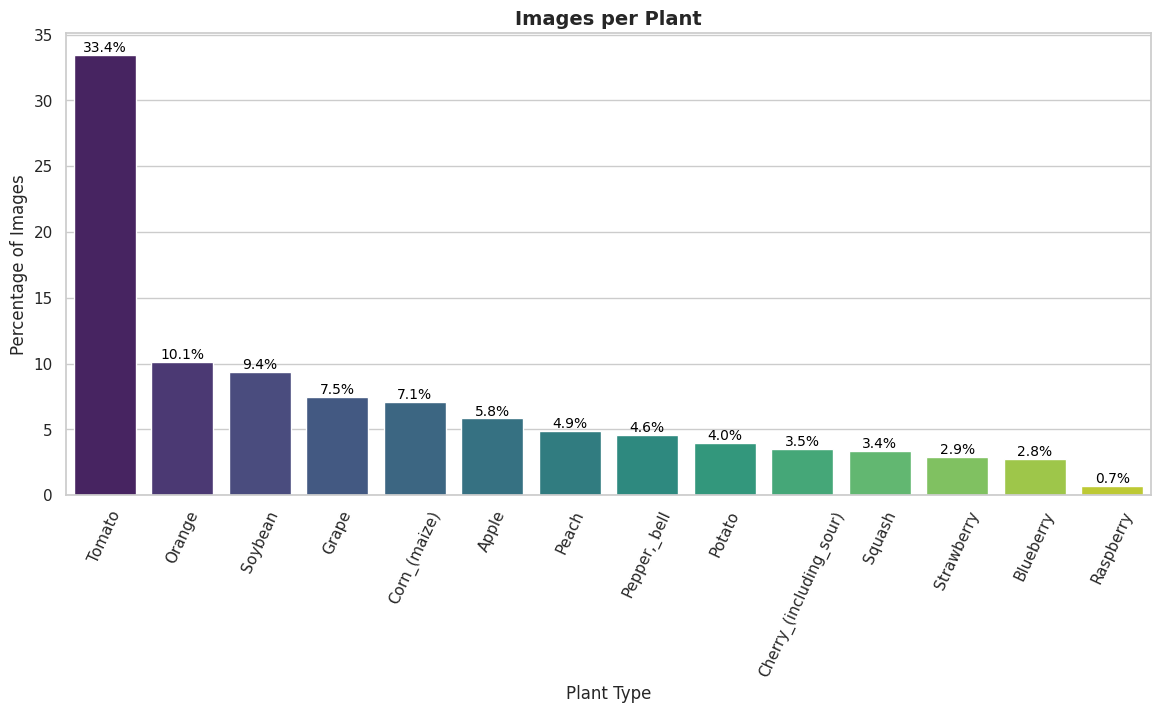

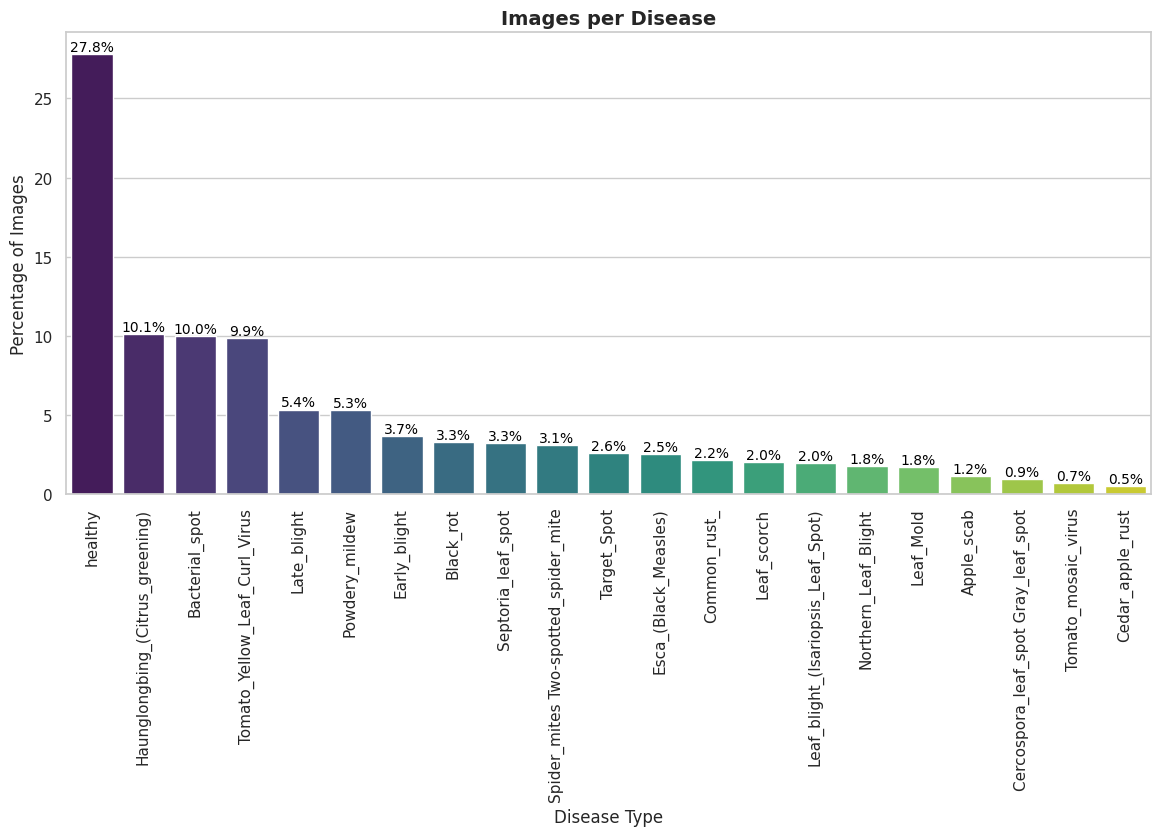

In [ ]:
# Define a utility function to draw a bar chart with percentage labels on each bar
def plot_bar(data, title, xlabel, ylabel, rotation=45):
    """
    Given a pandas Series `data` containing percentages, this function:
      1. Creates a bar chart.
      2. Annotates each bar with its percentage value.
      3. Applies titles and axis labels.
      4. Rotates x-axis labels for readability.
    """
    # Set up a wider figure so labels don’t overlap
    plt.figure(figsize=(14, 6))
    # Draw bars using Seaborn’s palette for a pleasing color gradient
    ax = sns.barplot(x=data.index, y=data.values, palette="viridis")

    # Annotate each bar with its height (percentage)
    for p in ax.patches:
        # Compute the coordinates for the annotation: center of bar top
        x = p.get_x() + p.get_width() / 2.0
        y = p.get_height()
        ax.annotate(
            f'{y:.1f}%',       # show one decimal place and a percent sign
            (x, y),            # position of the label
            ha='center',       # horizontal alignment
            va='bottom',       # vertical alignment (just above bar)
            fontsize=10,
            color='black'
        )

    # Add a bold title and label the axes
    plt.title(title, fontsize=14, fontweight="bold")
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    # Rotate x-axis labels if they’re too cramped
    plt.xticks(rotation=rotation)
    # Render the plot to the screen
    plt.show()


# Plot the percentage of images by plant type, with labels tilted for clarity
plot_bar(
    plant_counts,
    "Images per Plant",
    "Plant Type",
    "Percentage of Images",
    rotation=65
)

# Plot the percentage of images by disease category, with vertical labels
plot_bar(
    disease_counts,
    "Images per Disease",
    "Disease Type",
    "Percentage of Images",
    rotation=90
)


Number of diseases per plant:
Plant
Tomato                     10
Apple                       4
Grape                       4
Corn_(maize)                4
Potato                      3
Cherry_(including_sour)     2
Strawberry                  2
Peach                       2
Pepper,_bell                2
Blueberry                   1
Orange                      1
Raspberry                   1
Squash                      1
Soybean                     1
Name: Disease, dtype: int64


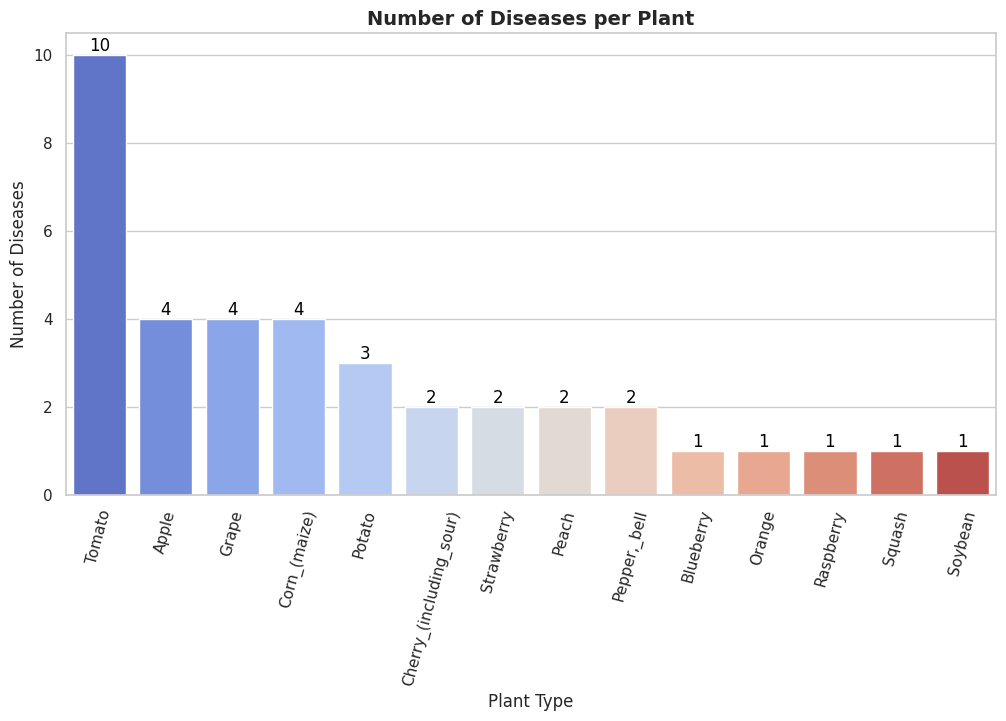

In [ ]:
# Calculate how many unique diseases each plant has and sort in descending order
disease_per_plant = data_info.groupby("Plant")["Disease"].nunique().sort_values(ascending=False)

# Print the result so we can quickly see which plants have the most disease categories
print("\nNumber of diseases per plant:")
print(disease_per_plant)

# Set up a bar chart to visualize the variety of diseases for each plant
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x=disease_per_plant.index,  # plant names along the x-axis
    y=disease_per_plant.values, # number of diseases on the y-axis
    palette="coolwarm"          # color palette to distinguish bars
)

# Annotate each bar with its count to make the chart self-explanatory
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(
        f'{height}',  # label = integer count of diseases
        (p.get_x() + p.get_width() / 2., height),  # position at the top center of the bar
        ha='center',  # horizontally center the text
        va='bottom',  # position text just above the bar
        fontsize=12,
        color='black'
    )

# Add a clear, bold title and label the axes
plt.title("Number of Diseases per Plant", fontsize=14, fontweight="bold")
plt.xlabel("Plant Type", fontsize=12)
plt.ylabel("Number of Diseases", fontsize=12)

# Rotate x-axis labels so long plant names don’t overlap
plt.xticks(rotation=75)

# Render the plot to the output
plt.show()

# Data Preparation and Modelling

In [ ]:
# Identify plants that are associated with more than one disease
plants_with_multiple_diseases = disease_per_plant[disease_per_plant > 1].index

# Keep only the rows in data_info for those plants with multiple diseases
data_info = data_info[data_info["Plant"].isin(plants_with_multiple_diseases)]

# Display updated dataset statistics after filtering
# How many distinct plant types remain?
print("\nNumber of unique plant species:", data_info["Plant"].nunique())
# How many distinct disease categories are left?
print("Number of unique diseases:", data_info["Disease"].nunique())
# What’s the new total count of images in this filtered dataset?
print("Total number of images:", data_info.shape[0])


Number of unique plant species: 9
Number of unique diseases: 20
Total number of images: 40000


In [ ]:
import os
import cv2
import numpy as np

def load_plant_disease_images(plant_name, dataset_path="/kaggle/input/plantvillage/PlantVillage", img_size=(128, 128)):
    """
    Load and preprocess images for a specific plant from the PlantVillage dataset.

    Parameters:
      plant_name (str): Name of the plant to load (matches folder prefix before "___").
      dataset_path (str): Root path to the PlantVillage dataset, containing 'train' and 'val' subfolders.
      img_size (tuple): Target size (width, height) to resize each image.

    Returns:
      train_images (np.ndarray): Normalized training images.
      train_labels (np.ndarray): Corresponding disease labels for training images.
      val_images (np.ndarray): Normalized validation images.
      val_labels (np.ndarray): Corresponding disease labels for validation images.
    """

    # Prepare empty lists to collect images and labels separately for train and validation
    train_images, train_labels = [], []
    val_images, val_labels     = [], []

    # We expect two subdirectories under dataset_path: one for training, one for validation
    sub_dirs = ["train", "val"]

    # Loop over each of the 'train' and 'val' folders
    for sub_dir in sub_dirs:
        dir_path = os.path.join(dataset_path, sub_dir)
        # Skip this subdirectory if it doesn't exist
        if os.path.exists(dir_path):
            # Iterate through each plant-disease folder, e.g. "Tomato___Bacterial_spot"
            for folder in os.listdir(dir_path):
                if folder.startswith(plant_name + "___"):
                    # Extract the disease part after the '___'
                    disease_name = folder.split("___")[1]
                    folder_path  = os.path.join(dir_path, folder)

                    # Read and process every image file in this folder
                    for img_name in os.listdir(folder_path):
                        img_path = os.path.join(folder_path, img_name)
                        img = cv2.imread(img_path)
                        # Only proceed if cv2 successfully loaded the file
                        if img is not None:
                            # Resize to the target dimensions
                            img = cv2.resize(img, img_size)
                            # Convert BGR (OpenCV default) to RGB for consistency
                            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                            # Store in the appropriate list based on train vs. validation
                            if sub_dir == "train":
                                train_images.append(img)
                                train_labels.append(disease_name)
                            else:
                                val_images.append(img)
                                val_labels.append(disease_name)

    # Convert lists to numpy arrays and normalize pixel values to [0, 1]
    train_images = np.array(train_images, dtype=np.float32) / 255.0
    train_labels = np.array(train_labels)
    val_images   = np.array(val_images,   dtype=np.float32) / 255.0
    val_labels   = np.array(val_labels)

    # Return the four arrays for use in model training and evaluation
    return train_images, train_labels, val_images, val_labels

In [ ]:
def plot_label_distribution(train_labels, plant_name):
    """
    Visualize how many images correspond to each disease for a given plant.

    Parameters:
    - train_labels: array-like of disease labels for training images
    - plant_name:   string name of the plant being analyzed
    """
    # Count how many times each unique label appears
    # np.unique(train_labels) gives all distinct diseases
    # np.sum(train_labels == label) counts occurrences of that label
    label_counts = {
        label: np.sum(train_labels == label)
        for label in np.unique(train_labels)
    }

    # Print a quick text summary in the console
    print(f"\nLabel distribution for {plant_name}:")
    for label, count in label_counts.items():
        print(f"  {label}: {count} images")

    # Prepare data for plotting: separate keys and values
    labels = list(label_counts.keys())
    counts = list(label_counts.values())

    # Set up a wide canvas so labels and annotations fit nicely
    plt.figure(figsize=(12, 6))
    # Draw a bar chart using Seaborn’s coolwarm palette
    ax = sns.barplot(x=labels, y=counts, palette="coolwarm")

    # Annotate each bar with its count at the top
    for p in ax.patches:
        x_pos = p.get_x() + p.get_width() / 2.0
        y_pos = p.get_height()
        ax.annotate(
            f"{int(y_pos)}",      # label text
            (x_pos, y_pos),        # position above bar center
            ha="center",           # horizontal alignment
            va="bottom",           # vertical alignment
            fontsize=12,
            color="black"
        )

    # Add chart title and axis labels for clarity
    plt.title(f"Distribution of Diseases for {plant_name}", fontsize=14, fontweight="bold")
    plt.xlabel("Disease Type", fontsize=12)
    plt.ylabel("Number of Images", fontsize=12)
    # Rotate x-axis labels to prevent overlap if names are long
    plt.xticks(rotation=45)
    # Render the plot
    plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np

def one_hot_encode_labels(train_labels, val_labels, mode="multi"):
    """
    Turn string labels into integers, and optionally into one-hot vectors.

    Parameters:
    - train_labels: array-like of labels for the training set
    - val_labels:   array-like of labels for the validation set
    - mode:         "multi" to return one-hot encoded arrays, anything else returns integer codes

    Returns:
    - train_encoded:    NumPy array of encoded training labels
    - val_encoded:      NumPy array of encoded validation labels
    - label_to_index:   dict mapping each label string to its integer code
    - index_to_label:   dict mapping integer codes back to label strings
    """

    # Combine both train and validation labels so the encoder learns all classes at once
    all_labels = np.concatenate((train_labels, val_labels))

    # Initialize and fit the label encoder on every label
    label_encoder = LabelEncoder()
    label_encoder.fit(all_labels)

    # Convert the original string labels into integer codes (0, 1, 2, …)
    train_encoded = label_encoder.transform(train_labels)
    val_encoded   = label_encoder.transform(val_labels)

    # If we're doing multi-class, wrap those codes into one-hot vectors
    if mode == "multi":
        # OneHotEncoder expects a column of shape (n_samples, 1)
        one_hot = OneHotEncoder(sparse_output=False, categories='auto')
        train_encoded = one_hot.fit_transform(train_encoded.reshape(-1, 1))
        val_encoded   = one_hot.transform(val_encoded.reshape(-1, 1))

    # Create lookup dictionaries for convenience:
    #  - label_to_index: e.g. {"Healthy": 0, "Rust": 1, …}
    #  - index_to_label: e.g. {0: "Healthy", 1: "Rust", …}
    label_to_index = {label: idx for idx, label in enumerate(label_encoder.classes_)}
    index_to_label = {idx: label for label, idx in label_to_index.items()}

    return train_encoded, val_encoded, label_to_index, index_to_label

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def augment_images(train_images, batch_size=32):
    """
    Apply common image augmentation techniques to increase dataset variety.

    Parameters:
    - train_images: NumPy array of shape (n_samples, height, width, channels)
    - batch_size:   Number of images to yield per batch from the generator

    Returns:
    - augmented_data: A Python generator yielding batches of augmented images
    """

    # Set up transformations:
    #  - rotation_range: randomly rotate images up to ±20°
    #  - width_shift_range & height_shift_range: translate images up to 20% horizontally/vertically
    #  - shear_range: apply shear transformations up to 15%
    #  - zoom_range: randomly zoom in/out up to 20%
    #  - horizontal_flip: mirror images left-right
    #  - fill_mode: fill in new pixels using nearest-neighbor strategy
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.15,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode="nearest"
    )

    # Create a data generator that:
    #  - shuffles the images on each epoch
    #  - yields batches of size `batch_size`
    augmented_data = datagen.flow(
        train_images,
        batch_size=batch_size,
        shuffle=True
    )

    return augmented_data

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2, VGG16, ResNet50

def create_transfer_learning_model(img_size, mode, label_to_index, model_name="MobileNet"):
    """
    Create and compile a transfer learning model for plant disease classification.

    Parameters:
        img_size (tuple): (height, width, channels) of input images.
        mode (str): "binary" for two-class output, "multi" for multi-class output.
        label_to_index (dict): maps class names to integer indices for multi-class.
        model_name (str): one of "MobileNet", "VGG16", or "ResNet50" to select backbone.

    Returns:
        tf.keras.Model: Compiled model ready for training.
    """

    # 1) Choose and load the pretrained backbone without its top layer
    if model_name == "MobileNet":
        # Lightweight model good for edge devices
        base_model = MobileNetV2(input_shape=img_size, include_top=False, weights="imagenet")
    elif model_name == "VGG16":
        # Classic deep network, larger but proven accuracy
        base_model = VGG16(input_shape=img_size, include_top=False, weights="imagenet")
    elif model_name == "ResNet50":
        # Deep residual network with skip connections
        base_model = ResNet50(input_shape=img_size, include_top=False, weights="imagenet")
    else:
        # Guard against invalid input
        raise ValueError("Invalid model_name: choose 'MobileNet', 'VGG16', or 'ResNet50'.")

    # 2) Freeze all layers in the pretrained backbone to retain learned features
    base_model.trainable = False

    # 3) Build the new classifier head on top of the frozen backbone
    model = models.Sequential([
        base_model,                        # pretrained convolutional base
        layers.GlobalAveragePooling2D(),   # collapse spatial dims by averaging
        layers.Dense(128, activation="relu"),  # learn new high-level features
        layers.Dropout(0.3)                # reduce overfitting
    ])

    # 4) Add output layer and select appropriate loss
    if mode == "binary":
        # Single neuron + sigmoid for healthy vs diseased
        model.add(layers.Dense(1, activation="sigmoid"))
        loss = "binary_crossentropy"
    else:
        # One neuron per class + softmax for multi-class probabilities
        num_classes = len(label_to_index)
        model.add(layers.Dense(num_classes, activation="softmax"))
        loss = "categorical_crossentropy"

    # 5) Compile the model with Adam optimizer and accuracy metric
    model.compile(
        optimizer="adam",
        loss=loss,
        metrics=["accuracy"]
    )

    return model

In [ ]:
import matplotlib.pyplot as plt

def train_model(model, train_images, train_labels, val_images, val_labels, epochs=10, batch_size=32):
    """
    Train the given model on training data and plot accuracy & loss curves.

    Parameters:
    - model:         A compiled Keras model
    - train_images:  NumPy array of training images
    - train_labels:  Labels (one-hot or integer) for training images
    - val_images:    NumPy array of validation images
    - val_labels:    Labels for validation images
    - epochs:        Number of epochs to train (default 10)
    - batch_size:    Size of each training batch (default 32)

    Returns:
    - model: The trained Keras model
    """

    # 1) Fit the model on the training data, validating on the holdout set
    history = model.fit(
        train_images, train_labels,
        validation_data=(val_images, val_labels),
        epochs=epochs,
        batch_size=batch_size
    )

    # 2) Prepare a wide figure to display accuracy and loss side by side
    plt.figure(figsize=(12, 4))

    # ——— Plot training & validation accuracy —————————————
    plt.subplot(1, 2, 1)                             # 1 row, 2 cols, position 1
    plt.plot(history.history["accuracy"], label="Train Accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
    plt.xlabel("Epochs")                             # X-axis label
    plt.ylabel("Accuracy")                           # Y-axis label
    plt.title("Model Accuracy")                      # Chart title
    plt.legend()                                     # Show legend

    # ——— Plot training & validation loss ——————————————————
    plt.subplot(1, 2, 2)                             # 1 row, 2 cols, position 2
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.xlabel("Epochs")                             # X-axis label
    plt.ylabel("Loss")                               # Y-axis label
    plt.title("Model Loss")                          # Chart title
    plt.legend()                                     # Show legend

    # 3) Render both plots to the screen
    plt.show()

    # Return the trained model for any further use
    return model

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def evaluate_model(model, val_images, val_encoded, val_labels, index_to_label, mode="multi"):
    """
    Evaluate a trained Keras model on validation data and display key metrics.

    Parameters:
    - model:           The trained tf.keras.Model to evaluate.
    - val_images:      NumPy array of validation images.
    - val_encoded:     Encoded validation labels (one-hot or integer codes).
    - val_labels:      Original validation labels (unused here, kept for context).
    - index_to_label:  Dict mapping integer indices back to label strings.
    - mode:            "binary" for two-class tasks, anything else for multi-class.
    """

    # 1) Get the raw prediction probabilities from the model
    y_pred_probs = model.predict(val_images)

    # 2) Convert probabilities into discrete predictions
    if mode == "binary":
        # For binary tasks, threshold at 0.5 to decide class 0 vs 1
        y_pred = (y_pred_probs > 0.5).astype(int).flatten()
        y_true = val_encoded.flatten()
    else:
        # For multi-class tasks, pick the index with the highest probability
        y_pred = np.argmax(y_pred_probs, axis=1)
        y_true = np.argmax(val_encoded, axis=1)

    # 3) Map numeric indices back to their original string labels
    y_pred_labels = np.array([index_to_label[idx] for idx in y_pred])
    y_true_labels = np.array([index_to_label[idx] for idx in y_true])

    # 4) Calculate core evaluation metrics
    accuracy  = accuracy_score(y_true_labels, y_pred_labels)
    precision = precision_score(y_true_labels, y_pred_labels, average="weighted")
    recall    = recall_score(y_true_labels, y_pred_labels, average="weighted")
    f1        = f1_score(y_true_labels, y_pred_labels, average="weighted")

    # 5) Print out the metrics in a human-readable format
    print("\nModel Evaluation Metrics:")
    print(f"  Accuracy : {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall   : {recall:.4f}")
    print(f"  F1 Score : {f1:.4f}\n")

    # 6) Show detailed classification report (precision/recall/f1 per class)
    print("Classification Report:\n")
    print(classification_report(y_true_labels, y_pred_labels))

    # 7) Build the confusion matrix using the known class order
    class_order = list(index_to_label.values())
    cm = confusion_matrix(y_true_labels, y_pred_labels, labels=class_order)

    # 8) Choose figure size based on number of classes
    if len(class_order) > 3:
        figsize = (10, 8)
    else:
        figsize = (6, 4)

    # 9) Plot the confusion matrix as a heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=class_order,
        yticklabels=class_order
    )
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.xticks(rotation=90)  # rotate x-axis labels if they overlap
    plt.tight_layout()       # adjust layout to fit everything
    plt.show()

In [ ]:
import os
import json
import pickle
import tensorflow as tf

def save_model_assets(model, label_to_index, index_to_label, image_size, mode, save_dir="saved_model"):
    """
    Save the trained model and its supporting files so you can reload them later.

    Parameters:
    - model:           Your trained tf.keras.Model
    - label_to_index:  Dict mapping each disease name to an integer
    - index_to_label:  Dict mapping each integer back to the disease name
    - image_size:      Tuple (width, height) used for model input
    - mode:            "binary" or "multi", indicating classification type
    - save_dir:        Folder where everything will be written
    """

    # Make sure the target folder exists (this will create it if needed)
    os.makedirs(save_dir, exist_ok=True)

    # 1) Write out the Keras model in HDF5 format
    model_path = os.path.join(save_dir, "plant_disease_model.h5")
    model.save(model_path)
    print(f"Saved model to {model_path}")

    # 2) Dump the label <-> index mappings as JSON for easy lookup on load
    mappings = {
        "label_to_index": label_to_index,
        "index_to_label": index_to_label
    }
    json_path = os.path.join(save_dir, "label_mappings.json")
    with open(json_path, "w") as f:
        json.dump(mappings, f)
    print(f"Saved label mappings to {json_path}")

    # 3) Pickle the image size and mode so you can restore your preprocessing later
    info = {
        "image_size": image_size,
        "mode": mode
    }
    pkl_path = os.path.join(save_dir, "model_info.pkl")
    with open(pkl_path, "wb") as f:
        pickle.dump(info, f)
    print(f"Saved model info to {pkl_path}")

    # 4) Final confirmation
    print(f"\nAll assets successfully saved in '{save_dir}'")

In [ ]:
import os
import json
import pickle
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report, confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt

# ─── Main pipeline: process a single plant’s data and train/evaluate models ───
def process_and_train_plant(
    plant_name,
    dataset_path="dataset",
    img_size=(128, 128),
    epochs=10,
    batch_size=32
):
    """
    For the given plant, this function:
      1. Loads train/validation images and labels
      2. Visualizes label distribution
      3. Chooses binary vs. multi-class mode
      4. Encodes labels for modeling
      5. Trains and evaluates multiple transfer-learning models
      6. Saves each trained model and its assets

    Parameters:
      - plant_name   : Name of the plant folder to process
      - dataset_path : Root folder containing 'train' and 'val' subdirectories
      - img_size     : Target image dimensions (height, width)
      - epochs       : Number of training epochs per model
      - batch_size   : Batch size for training
    """
    # 1) Inform the user which plant is being processed
    print(f"\nProcessing plant: {plant_name}")

    # 2) Load images and labels for train/validation
    train_images, train_labels, val_images, val_labels = \
        load_plant_disease_images(plant_name, dataset_path, img_size)

    # 3) Show how many examples exist per disease for this plant
    plot_label_distribution(train_labels, plant_name)

    # 4) If no data is found, skip further processing
    if len(train_images) == 0 or len(val_images) == 0:
        print(f"Skipping {plant_name} due to no data.")
        return

    # 5) Decide whether this is a binary or multi-class problem
    num_diseases = len(set(train_labels))
    mode = "binary" if num_diseases == 2 else "multi"
    print(f"Mode selected for {plant_name}: {mode}")

    # 6) Encode labels into numeric or one-hot format
    train_one_hot, val_one_hot, label_to_index, index_to_label = \
        one_hot_encode_labels(train_labels, val_labels, mode)

    # 7) Loop over selected pretrained backbones
    for model_name in ["MobileNet", "VGG16"]:

        print("\t\t", "=" * 50)
        print("\t\t", f"Training Model: {model_name}")
        print("\t\t", "=" * 50)

        # 8) Build a new transfer learning model with frozen base
        model = create_transfer_learning_model(
            (*img_size, 3),  # add channel dimension
            mode,
            label_to_index,
            model_name
        )

        # 9) Train the model and retrieve the fitted instance
        trained_model = train_model(
            model,
            train_images, train_one_hot,
            val_images, val_one_hot,
            epochs,
            batch_size
        )

        # 10) Evaluate performance on the validation set
        evaluate_model(
            trained_model,
            val_images,
            val_one_hot,
            val_labels,
            index_to_label,
            mode
        )

        # 11) Save the trained model and its metadata for later use
        save_dir = f"saved_models/{model_name}/{plant_name}"
        save_model_assets(
            trained_model,
            label_to_index,
            index_to_label,
            img_size,
            mode,
            save_dir=save_dir
        )

Processing plant: Tomato

Processing plant: Tomato

Label distribution for Tomato:
Bacterial_spot: 1702 images
Early_blight: 800 images
Late_blight: 1527 images
Leaf_Mold: 761 images
Septoria_leaf_spot: 1417 images
Spider_mites Two-spotted_spider_mite: 1341 images
Target_Spot: 1123 images
Tomato_Yellow_Leaf_Curl_Virus: 4286 images
Tomato_mosaic_virus: 299 images
healthy: 1273 images


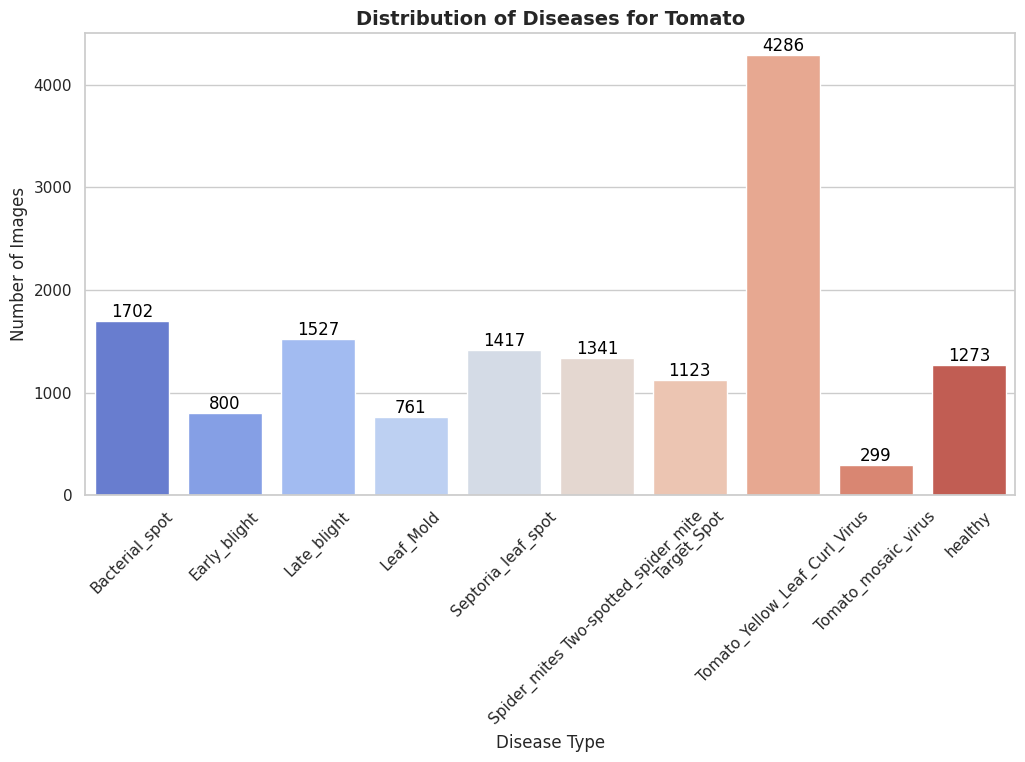

Mode selected for Tomato: multi
		 Training Model: MobileNet
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.6716 - loss: 1.0069 - val_accuracy: 0.8857 - val_loss: 0.3707
Epoch 2/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.8646 - loss: 0.3943 - val_accuracy: 0.8995 - val_loss: 0.3030
Epoch 3/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.8919 - loss: 0.3161 - val_accuracy: 0.9000 - val_loss: 0.2932
Epoch 4/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9120 - loss: 0.2513 - val_accuracy: 0.9143 - val_loss: 0.2601
Epoch 5/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9276 - loss: 0.2162 - val_accuracy: 0.9110 - val_loss: 0.2556
Epoch 6/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9335 - loss: 0.1910 - val_accuracy: 0.9188 - val_loss: 0.2426
Epoch 7/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9149 - loss: 0.2519 - val_accuracy: 0.9212 - val

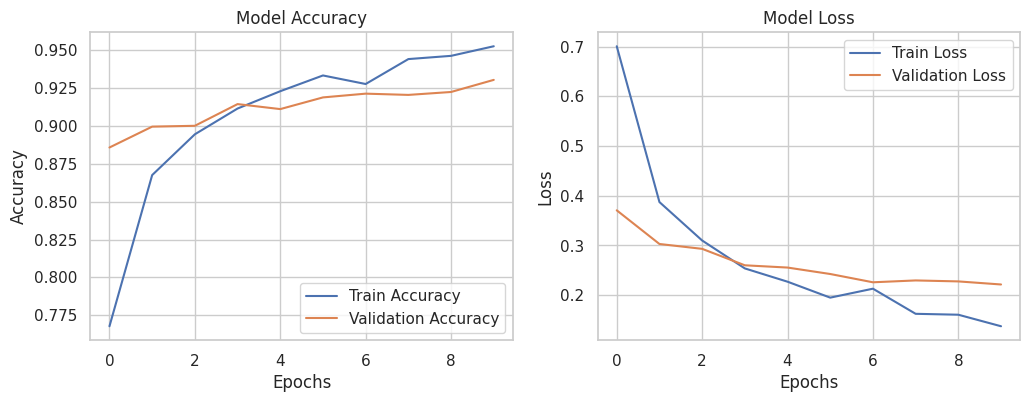

114/114 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step

Model Evaluation Metrics:
Accuracy:  0.9303
Precision: 0.9303
Recall:    0.9303
F1 Score:  0.9296

Classification Report:

                                      precision    recall  f1-score   support

                      Bacterial_spot       0.92      0.95      0.94       425
                        Early_blight       0.83      0.77      0.79       200
                         Late_blight       0.91      0.96      0.93       382
                           Leaf_Mold       0.93      0.82      0.87       191
                  Septoria_leaf_spot       0.94      0.87      0.90       354
Spider_mites Two-spotted_spider_mite       0.87      0.94      0.91       335
                         Target_Spot       0.87      0.84      0.86       281
       Tomato_Yellow_Leaf_Curl_Virus       0.99      0.99      0.99      1071
                 Tomato_mosaic_virus       0.97      0.89      0.93        74
                             healthy       0.93      

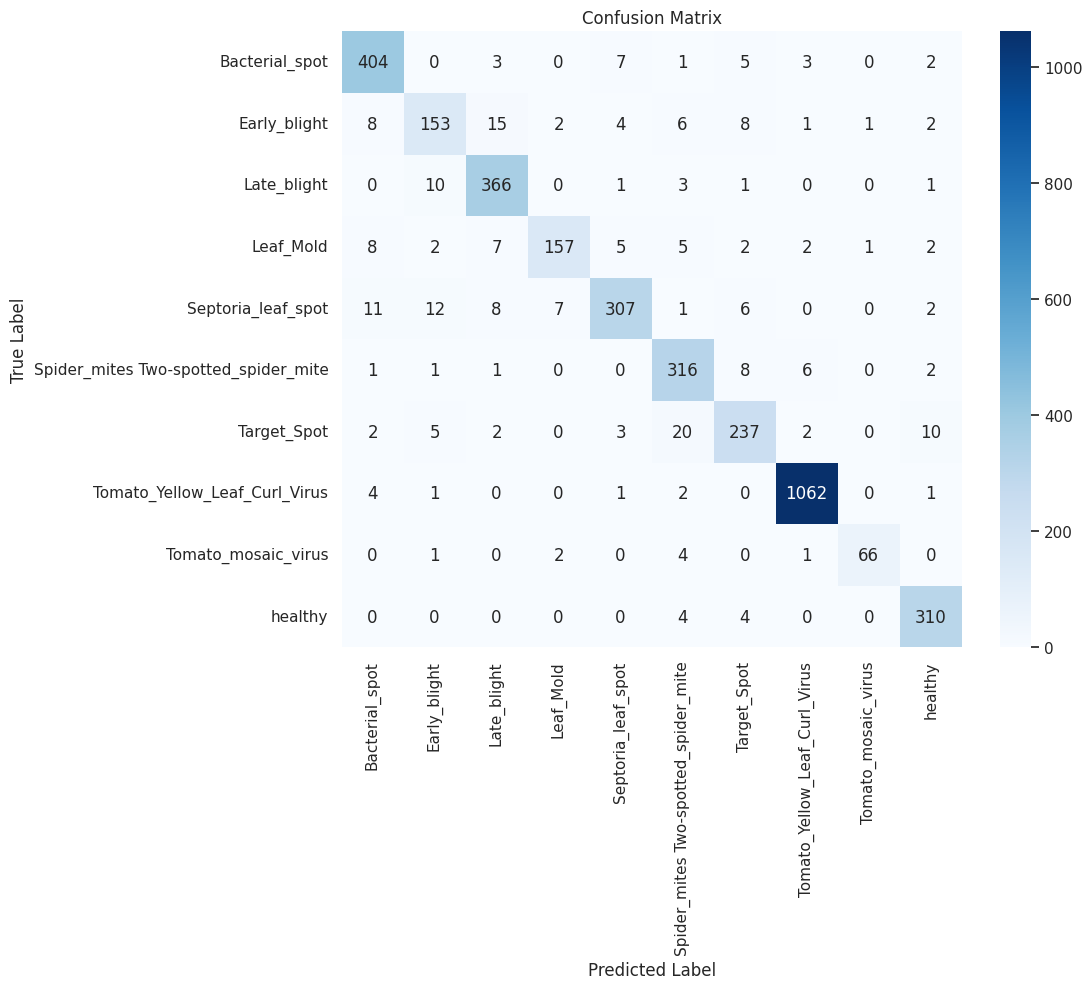


Model and necessary assets saved successfully in 'saved_models/MobileNet/Tomato'
		 Training Model: VGG16
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 48s 91ms/step - accuracy: 0.4608 - loss: 1.6393 - val_accuracy: 0.7659 - val_loss: 0.8320
Epoch 2/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 33s 72ms/step - accuracy: 0.7187 - loss: 0.8669 - val_accuracy: 0.8009 - val_loss: 0.6323
Epoch 3/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 33s 73ms/step - accuracy: 0.7696 - loss: 0.6935 - val_accuracy: 0.8337 - val_loss: 0.5515
Epoch 4/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 33s 73ms/step - accuracy: 0.7915 - loss: 0.6247 - val_accuracy: 0.8359 - val_loss: 0.5076
Epoch 5/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 33s 73ms/step - accuracy: 0.8142 - loss: 0.5552 - val_accuracy: 0.8466 - val_loss: 0.4733
Epoch 6/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 33s 73ms/step - accuracy: 0.8318 - loss: 0.5221 - val_accuracy: 0.8469 - val_loss: 0.4625
Epoch 7/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 33s 73ms/step - accura

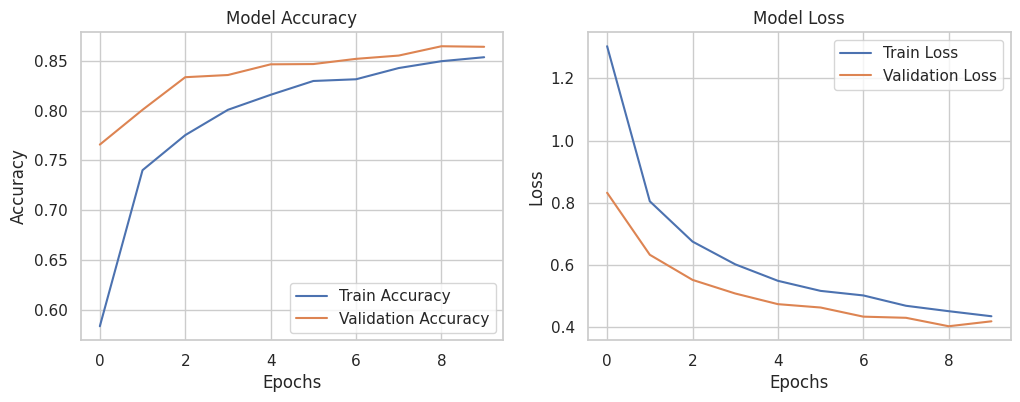

114/114 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step

Model Evaluation Metrics:
Accuracy:  0.8642
Precision: 0.8709
Recall:    0.8642
F1 Score:  0.8646

Classification Report:

                                      precision    recall  f1-score   support

                      Bacterial_spot       0.82      0.94      0.88       425
                        Early_blight       0.66      0.57      0.61       200
                         Late_blight       0.88      0.81      0.84       382
                           Leaf_Mold       0.84      0.71      0.77       191
                  Septoria_leaf_spot       0.69      0.92      0.79       354
Spider_mites Two-spotted_spider_mite       0.85      0.85      0.85       335
                         Target_Spot       0.84      0.78      0.81       281
       Tomato_Yellow_Leaf_Curl_Virus       0.97      0.92      0.95      1071
                 Tomato_mosaic_virus       0.94      0.84      0.89        74
                             healthy       0.98      

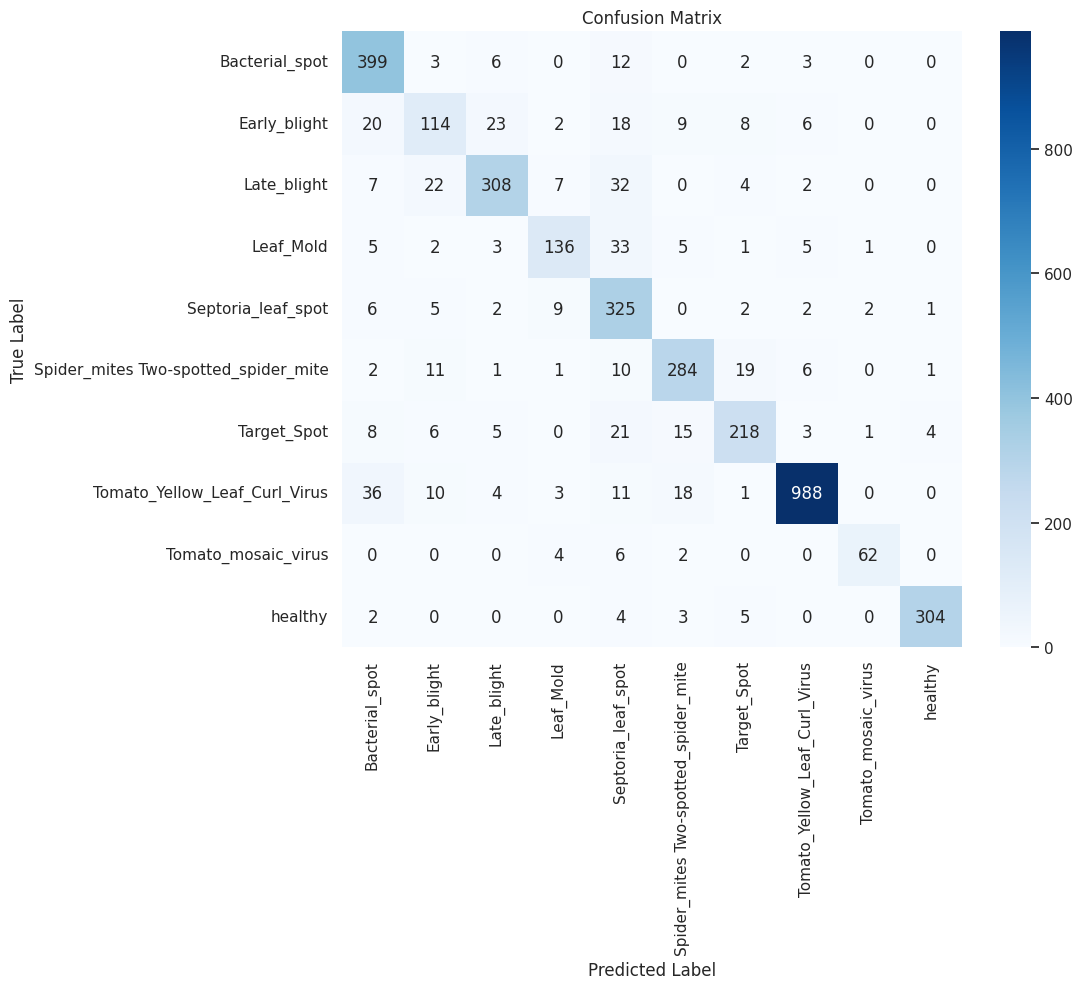


Model and necessary assets saved successfully in 'saved_models/VGG16/Tomato'
Processing plant: Strawberry

Processing plant: Strawberry

Label distribution for Strawberry:
Leaf_scorch: 887 images
healthy: 364 images


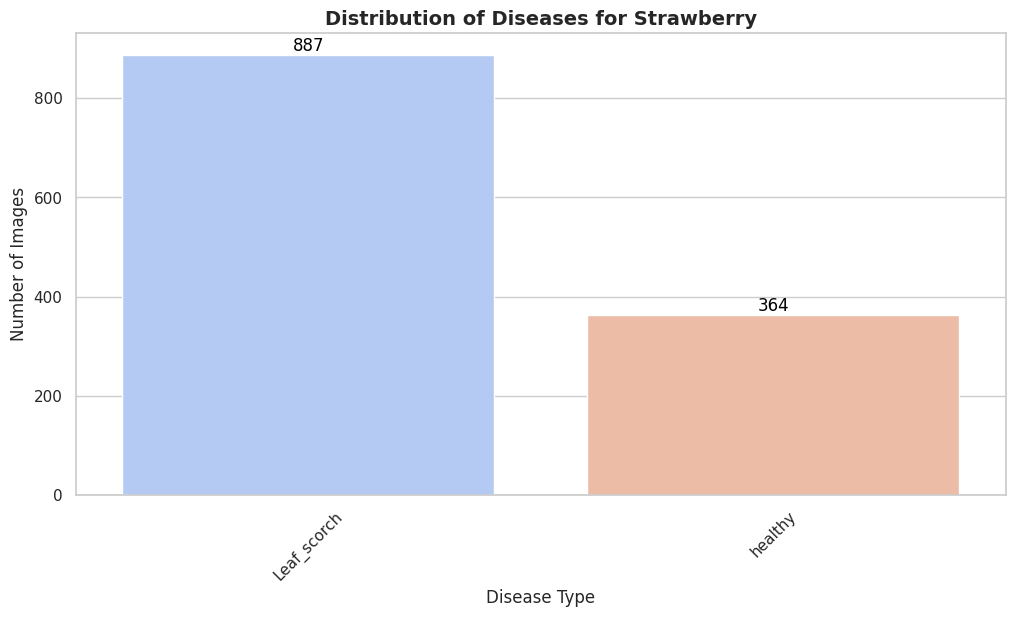

Mode selected for Strawberry: binary
		 Training Model: MobileNet
Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 16s 239ms/step - accuracy: 0.8567 - loss: 0.2601 - val_accuracy: 0.9936 - val_loss: 0.0123
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9963 - loss: 0.0071 - val_accuracy: 0.9968 - val_loss: 0.0077
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 0.9968 - val_loss: 0.0089
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9996 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0056
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 0.0047
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 0.0044
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 1.0000 - loss: 5.0010e-04 - val_accuracy: 1.0000 - val_loss: 0.0035
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1

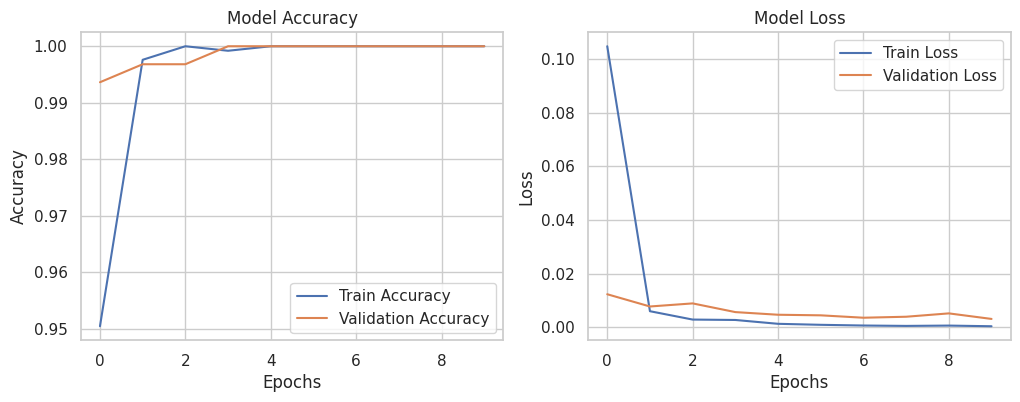

10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 300ms/step

Model Evaluation Metrics:
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1 Score:  1.0000

Classification Report:

              precision    recall  f1-score   support

 Leaf_scorch       1.00      1.00      1.00       222
     healthy       1.00      1.00      1.00        92

    accuracy                           1.00       314
   macro avg       1.00      1.00      1.00       314
weighted avg       1.00      1.00      1.00       314



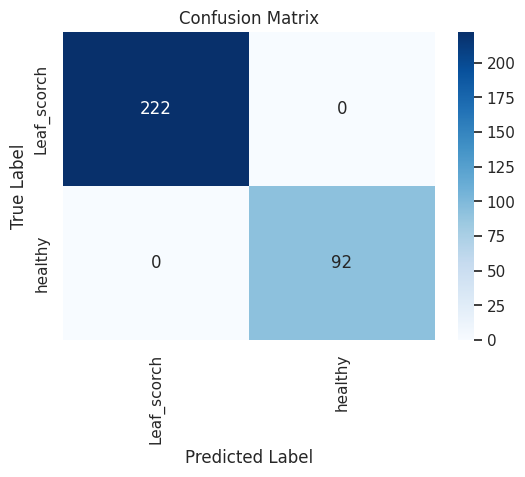


Model and necessary assets saved successfully in 'saved_models/MobileNet/Strawberry'
		 Training Model: VGG16
Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 291ms/step - accuracy: 0.7007 - loss: 0.5512 - val_accuracy: 0.8631 - val_loss: 0.2692
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9407 - loss: 0.2192 - val_accuracy: 0.9650 - val_loss: 0.1521
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - accuracy: 0.9831 - loss: 0.1247 - val_accuracy: 0.9777 - val_loss: 0.1061
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.9739 - loss: 0.1060 - val_accuracy: 0.9777 - val_loss: 0.0901
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.9818 - loss: 0.0721 - val_accuracy: 0.9809 - val_loss: 0.0919
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.9865 - loss: 0.0590 - val_accuracy: 0.9809 - val_loss: 0.0670
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.9867 - loss: 0.0522 - val_accuracy: 0.9841 - val_loss: 0.06

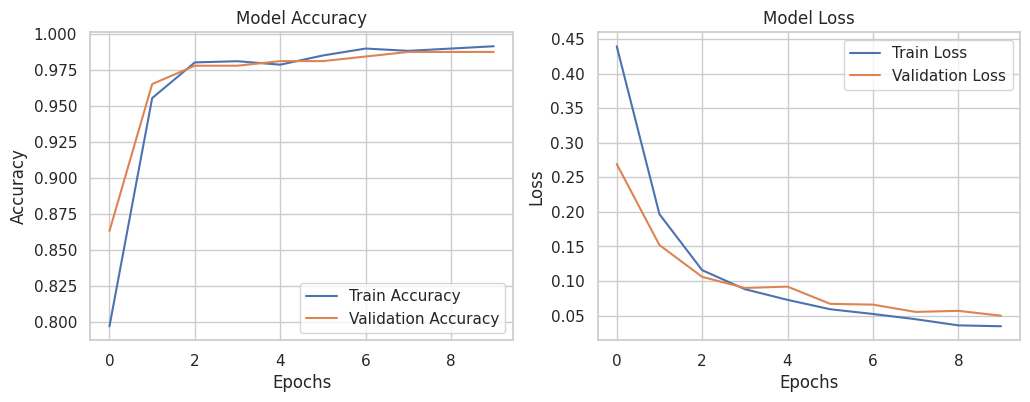

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step

Model Evaluation Metrics:
Accuracy:  0.9873
Precision: 0.9873
Recall:    0.9873
F1 Score:  0.9873

Classification Report:

              precision    recall  f1-score   support

 Leaf_scorch       0.99      0.99      0.99       222
     healthy       0.98      0.98      0.98        92

    accuracy                           0.99       314
   macro avg       0.98      0.98      0.98       314
weighted avg       0.99      0.99      0.99       314



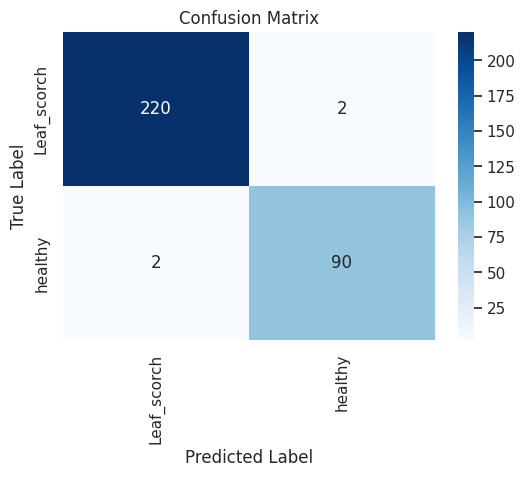


Model and necessary assets saved successfully in 'saved_models/VGG16/Strawberry'
Processing plant: Pepper,_bell

Processing plant: Pepper,_bell

Label distribution for Pepper,_bell:
Bacterial_spot: 797 images
healthy: 1183 images


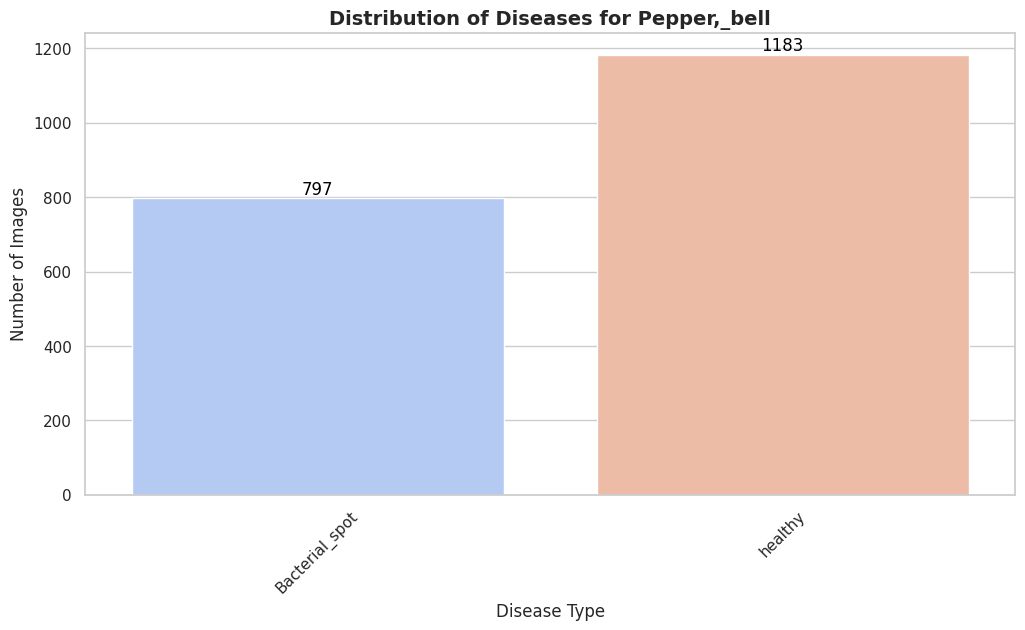

Mode selected for Pepper,_bell: binary
		 Training Model: MobileNet
Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 142ms/step - accuracy: 0.8259 - loss: 0.3815 - val_accuracy: 0.9798 - val_loss: 0.0925
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9739 - loss: 0.0743 - val_accuracy: 0.9677 - val_loss: 0.0886
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9758 - loss: 0.0607 - val_accuracy: 0.9818 - val_loss: 0.0550
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9946 - loss: 0.0302 - val_accuracy: 0.9859 - val_loss: 0.0610
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9928 - loss: 0.0225 - val_accuracy: 0.9838 - val_loss: 0.0475
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9925 - loss: 0.0316 - val_accuracy: 0.9818 - val_loss: 0.0606
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9978 - loss: 0.0147 - val_accuracy: 0.9838 - val_loss: 0.0470
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 

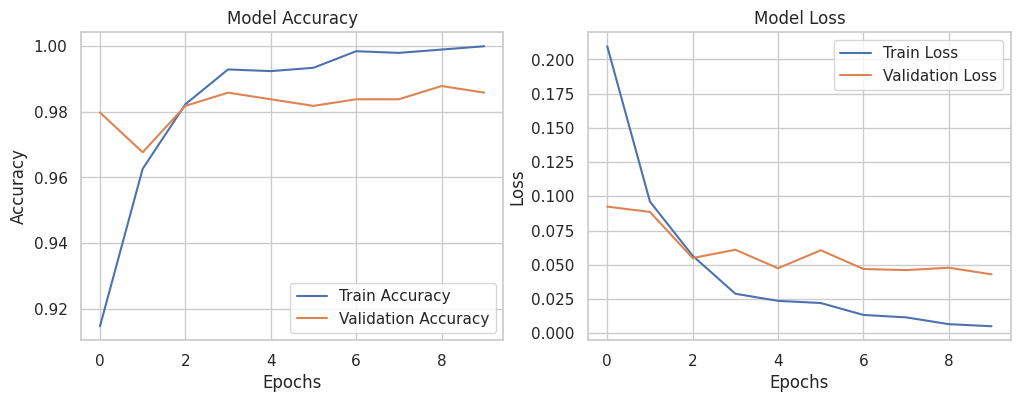

16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 191ms/step

Model Evaluation Metrics:
Accuracy:  0.9859
Precision: 0.9859
Recall:    0.9859
F1 Score:  0.9859

Classification Report:

                precision    recall  f1-score   support

Bacterial_spot       0.98      0.98      0.98       200
       healthy       0.99      0.99      0.99       295

      accuracy                           0.99       495
     macro avg       0.99      0.98      0.99       495
  weighted avg       0.99      0.99      0.99       495



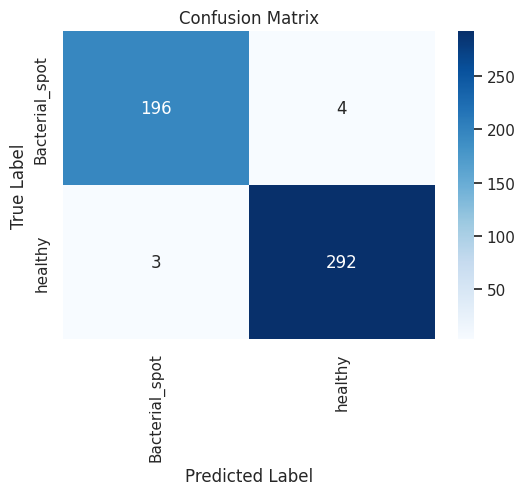


Model and necessary assets saved successfully in 'saved_models/MobileNet/Pepper,_bell'
		 Training Model: VGG16
Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 14s 189ms/step - accuracy: 0.6682 - loss: 0.6030 - val_accuracy: 0.8646 - val_loss: 0.3676
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.8404 - loss: 0.3848 - val_accuracy: 0.8788 - val_loss: 0.3125
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - accuracy: 0.8780 - loss: 0.3207 - val_accuracy: 0.8808 - val_loss: 0.2786
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 0.8852 - loss: 0.3010 - val_accuracy: 0.8929 - val_loss: 0.2559
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.8980 - loss: 0.2634 - val_accuracy: 0.8970 - val_loss: 0.2415
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.9087 - loss: 0.2448 - val_accuracy: 0.8990 - val_loss: 0.2288
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.9104 - loss: 0.2289 - val_accuracy: 0.9030 - val_loss: 0.2

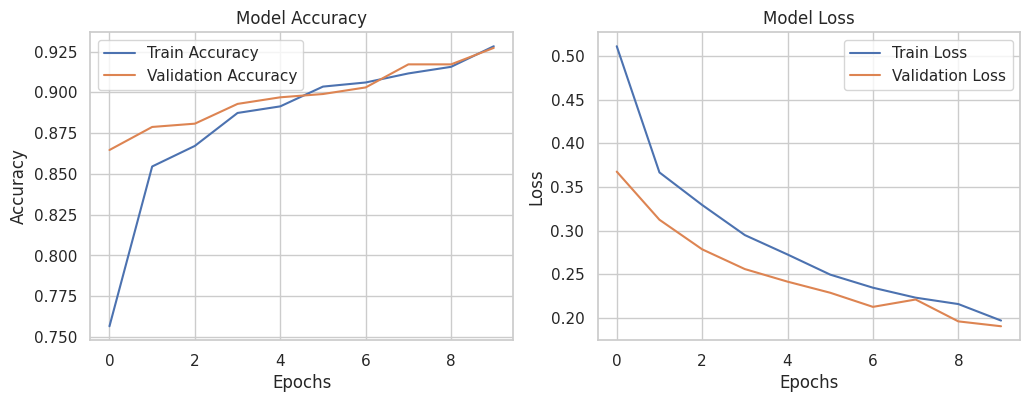

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step

Model Evaluation Metrics:
Accuracy:  0.9273
Precision: 0.9272
Recall:    0.9273
F1 Score:  0.9272

Classification Report:

                precision    recall  f1-score   support

Bacterial_spot       0.91      0.91      0.91       200
       healthy       0.94      0.94      0.94       295

      accuracy                           0.93       495
     macro avg       0.93      0.92      0.92       495
  weighted avg       0.93      0.93      0.93       495



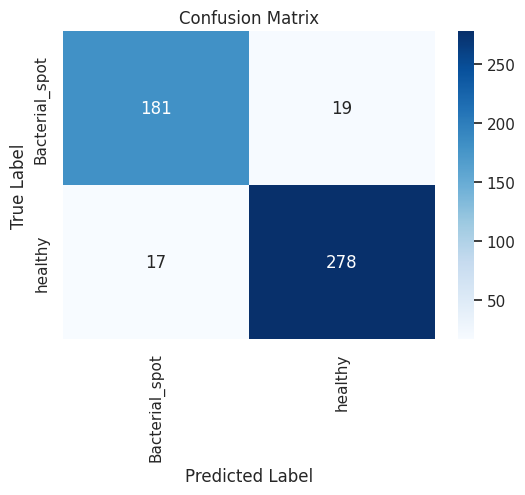


Model and necessary assets saved successfully in 'saved_models/VGG16/Pepper,_bell'
Processing plant: Peach

Processing plant: Peach

Label distribution for Peach:
Bacterial_spot: 1838 images
healthy: 288 images


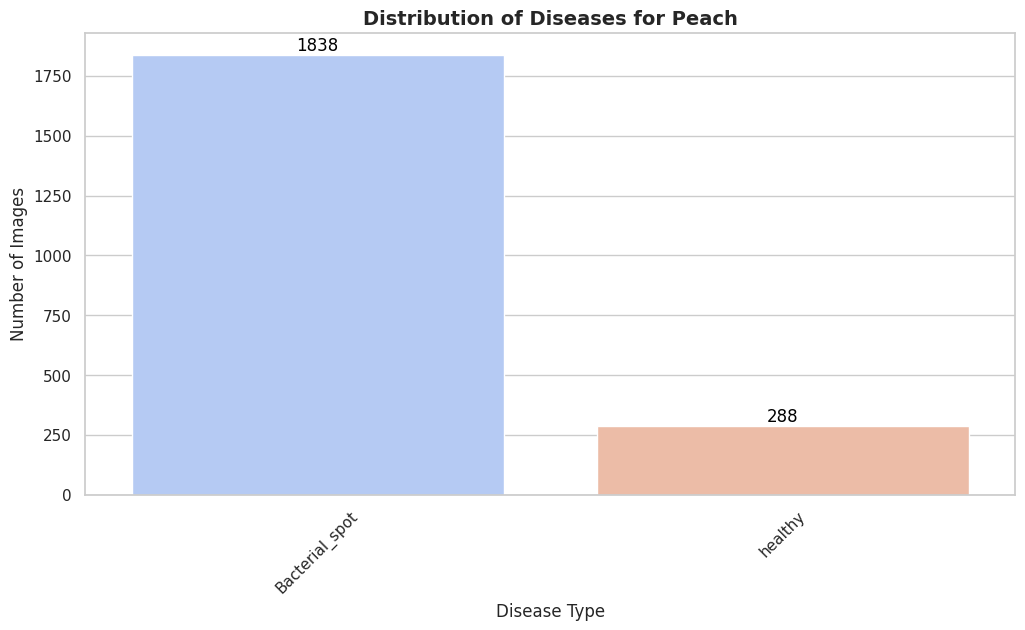

Mode selected for Peach: binary
		 Training Model: MobileNet
Epoch 1/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 16s 144ms/step - accuracy: 0.8951 - loss: 0.2697 - val_accuracy: 0.9906 - val_loss: 0.0365
Epoch 2/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9902 - loss: 0.0277 - val_accuracy: 0.9944 - val_loss: 0.0216
Epoch 3/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9969 - loss: 0.0109 - val_accuracy: 0.9868 - val_loss: 0.0341
Epoch 4/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9994 - loss: 0.0055 - val_accuracy: 0.9962 - val_loss: 0.0175
Epoch 5/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9987 - loss: 0.0064 - val_accuracy: 0.9944 - val_loss: 0.0202
Epoch 6/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9997 - loss: 0.0029 - val_accuracy: 0.9962 - val_loss: 0.0176
Epoch 7/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 0.9962 - val_loss: 0.0217
Epoch 8/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/st

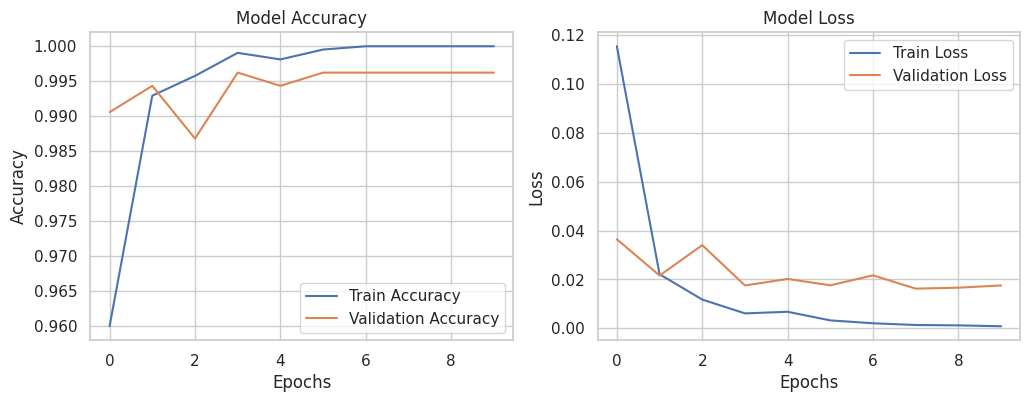

17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 176ms/step

Model Evaluation Metrics:
Accuracy:  0.9962
Precision: 0.9962
Recall:    0.9962
F1 Score:  0.9962

Classification Report:

                precision    recall  f1-score   support

Bacterial_spot       1.00      1.00      1.00       459
       healthy       1.00      0.97      0.99        72

      accuracy                           1.00       531
     macro avg       1.00      0.99      0.99       531
  weighted avg       1.00      1.00      1.00       531



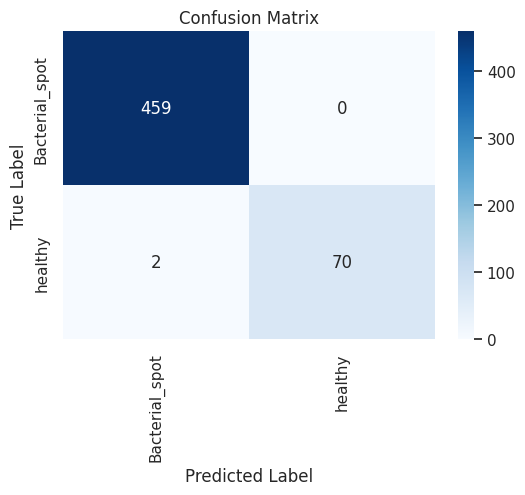


Model and necessary assets saved successfully in 'saved_models/MobileNet/Peach'
		 Training Model: VGG16
Epoch 1/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 17s 209ms/step - accuracy: 0.8170 - loss: 0.4673 - val_accuracy: 0.8644 - val_loss: 0.2926
Epoch 2/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.8931 - loss: 0.2404 - val_accuracy: 0.9284 - val_loss: 0.1743
Epoch 3/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.9389 - loss: 0.1539 - val_accuracy: 0.9605 - val_loss: 0.1204
Epoch 4/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.9688 - loss: 0.1023 - val_accuracy: 0.9755 - val_loss: 0.0898
Epoch 5/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.9716 - loss: 0.0792 - val_accuracy: 0.9812 - val_loss: 0.0707
Epoch 6/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.9844 - loss: 0.0601 - val_accuracy: 0.9868 - val_loss: 0.0598
Epoch 7/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.9843 - loss: 0.0543 - val_accuracy: 0.9774 - val_loss: 0.0781
Epo

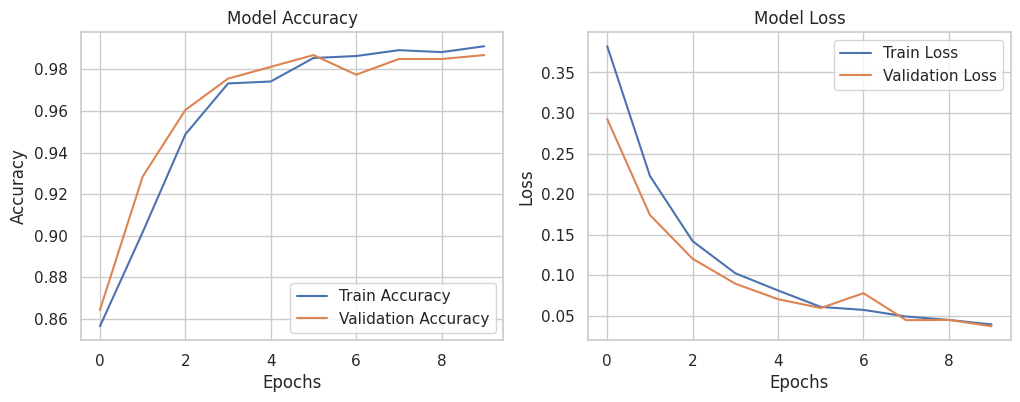

17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step

Model Evaluation Metrics:
Accuracy:  0.9868
Precision: 0.9867
Recall:    0.9868
F1 Score:  0.9867

Classification Report:

                precision    recall  f1-score   support

Bacterial_spot       0.99      1.00      0.99       459
       healthy       0.97      0.93      0.95        72

      accuracy                           0.99       531
     macro avg       0.98      0.96      0.97       531
  weighted avg       0.99      0.99      0.99       531



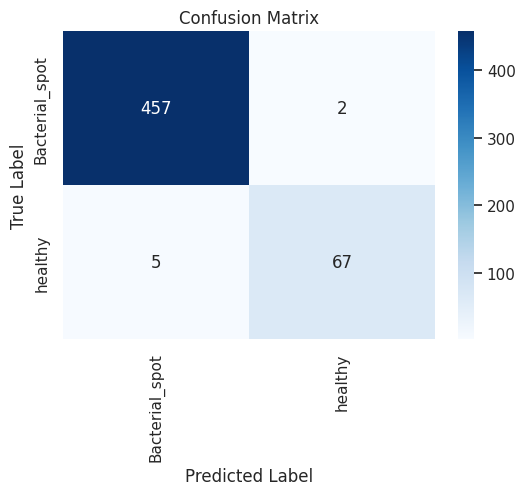


Model and necessary assets saved successfully in 'saved_models/VGG16/Peach'
Processing plant: Potato

Processing plant: Potato

Label distribution for Potato:
Early_blight: 800 images
Late_blight: 800 images
healthy: 121 images


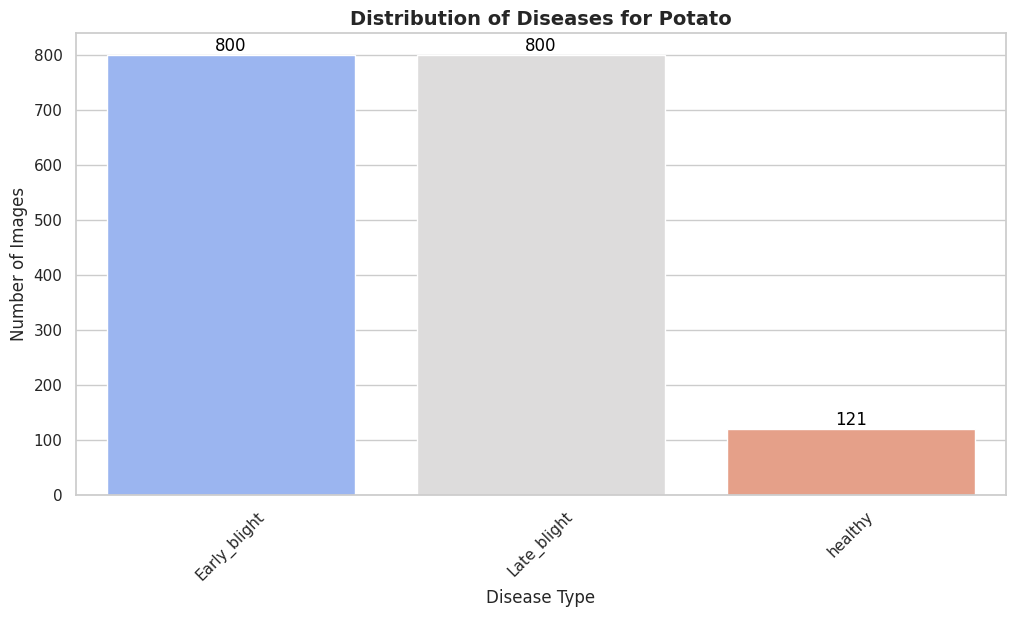

Mode selected for Potato: multi
		 Training Model: MobileNet
Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 17s 175ms/step - accuracy: 0.7414 - loss: 0.6001 - val_accuracy: 0.9768 - val_loss: 0.1006
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9694 - loss: 0.0855 - val_accuracy: 0.9722 - val_loss: 0.0951
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9847 - loss: 0.0469 - val_accuracy: 0.9698 - val_loss: 0.1104
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9814 - loss: 0.0426 - val_accuracy: 0.9768 - val_loss: 0.0863
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9934 - loss: 0.0259 - val_accuracy: 0.9768 - val_loss: 0.0895
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9952 - loss: 0.0221 - val_accuracy: 0.9791 - val_loss: 0.0941
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9981 - loss: 0.0153 - val_accuracy: 0.9791 - val_loss: 0.0912
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/st

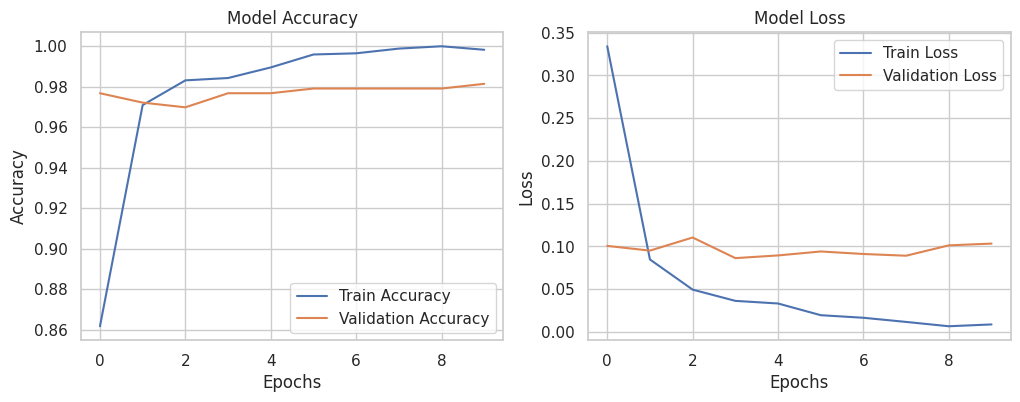

14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 218ms/step

Model Evaluation Metrics:
Accuracy:  0.9814
Precision: 0.9815
Recall:    0.9814
F1 Score:  0.9815

Classification Report:

              precision    recall  f1-score   support

Early_blight       0.99      0.98      0.99       200
 Late_blight       0.98      0.98      0.98       200
     healthy       0.94      0.94      0.94        31

    accuracy                           0.98       431
   macro avg       0.97      0.97      0.97       431
weighted avg       0.98      0.98      0.98       431



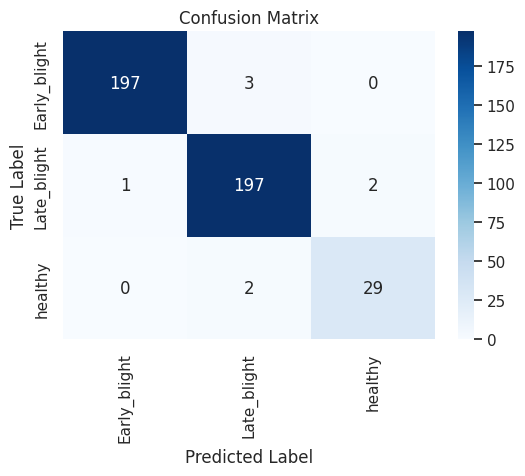


Model and necessary assets saved successfully in 'saved_models/MobileNet/Potato'
		 Training Model: VGG16
Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 201ms/step - accuracy: 0.5685 - loss: 0.8799 - val_accuracy: 0.8422 - val_loss: 0.5115
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.8322 - loss: 0.4915 - val_accuracy: 0.8840 - val_loss: 0.3716
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.8667 - loss: 0.3825 - val_accuracy: 0.8886 - val_loss: 0.2961
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.8835 - loss: 0.3170 - val_accuracy: 0.9118 - val_loss: 0.2547
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.9040 - loss: 0.2602 - val_accuracy: 0.9281 - val_loss: 0.2371
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.9117 - loss: 0.2620 - val_accuracy: 0.9188 - val_loss: 0.2149
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.9135 - loss: 0.2374 - val_accuracy: 0.9281 - val_loss: 0.1964
Ep

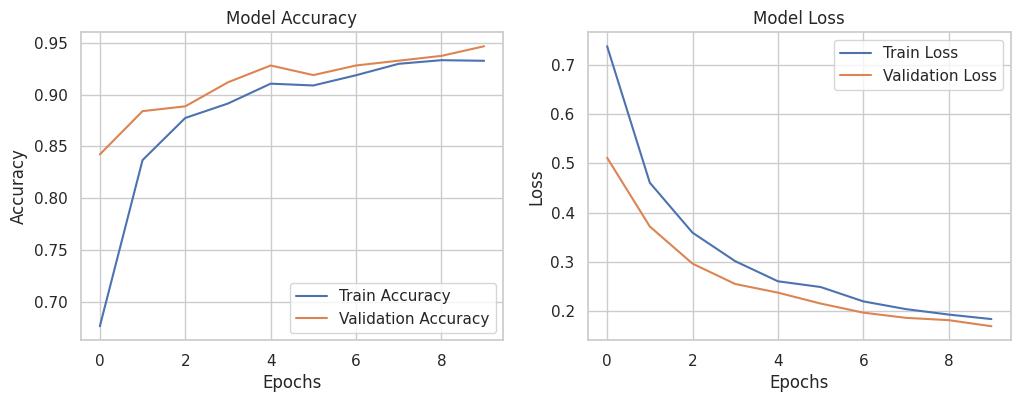

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step

Model Evaluation Metrics:
Accuracy:  0.9466
Precision: 0.9466
Recall:    0.9466
F1 Score:  0.9466

Classification Report:

              precision    recall  f1-score   support

Early_blight       0.97      0.96      0.97       200
 Late_blight       0.94      0.95      0.94       200
     healthy       0.83      0.81      0.82        31

    accuracy                           0.95       431
   macro avg       0.91      0.91      0.91       431
weighted avg       0.95      0.95      0.95       431



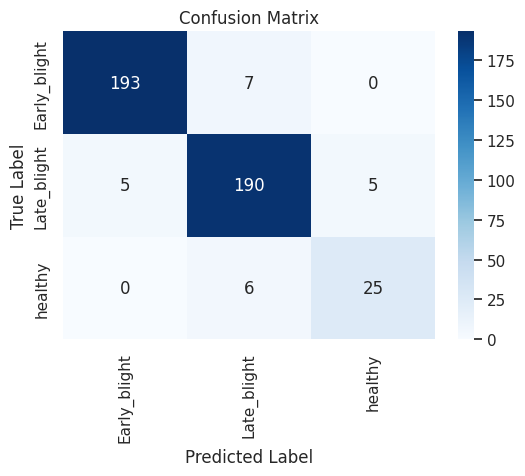


Model and necessary assets saved successfully in 'saved_models/VGG16/Potato'
Processing plant: Corn_(maize)

Processing plant: Corn_(maize)

Label distribution for Corn_(maize):
Cercospora_leaf_spot Gray_leaf_spot: 410 images
Common_rust_: 953 images
Northern_Leaf_Blight: 788 images
healthy: 929 images


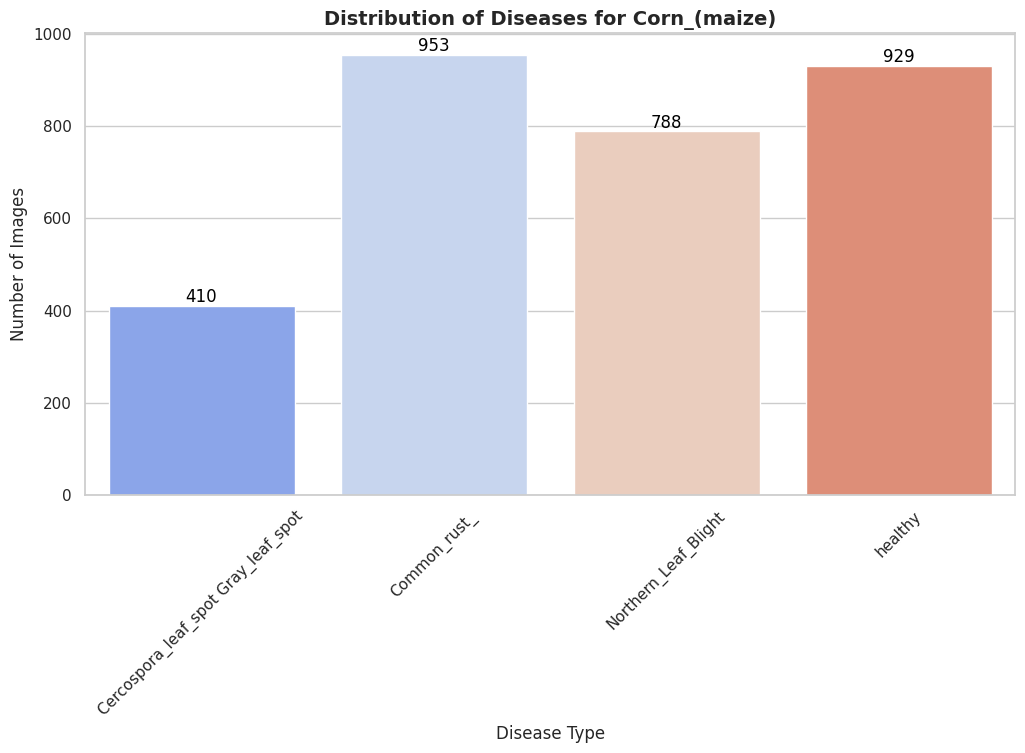

Mode selected for Corn_(maize): multi
		 Training Model: MobileNet
Epoch 1/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 18s 107ms/step - accuracy: 0.7977 - loss: 0.5480 - val_accuracy: 0.9456 - val_loss: 0.1618
Epoch 2/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9527 - loss: 0.1432 - val_accuracy: 0.9521 - val_loss: 0.1253
Epoch 3/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9647 - loss: 0.1007 - val_accuracy: 0.9534 - val_loss: 0.1235
Epoch 4/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9737 - loss: 0.0695 - val_accuracy: 0.9443 - val_loss: 0.1297
Epoch 5/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9757 - loss: 0.0652 - val_accuracy: 0.9495 - val_loss: 0.1192
Epoch 6/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9828 - loss: 0.0487 - val_accuracy: 0.9508 - val_loss: 0.1308
Epoch 7/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9908 - loss: 0.0330 - val_accuracy: 0.9495 - val_loss: 0.1232
Epoch 8/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 1

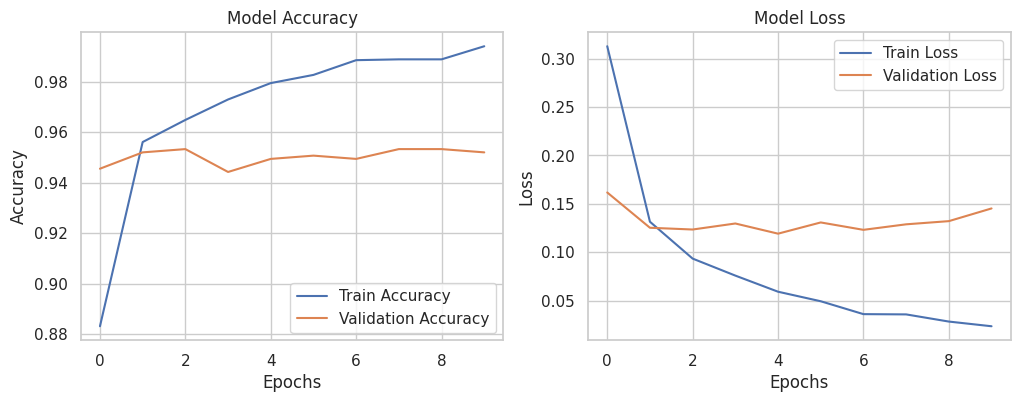

25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 124ms/step

Model Evaluation Metrics:
Accuracy:  0.9521
Precision: 0.9519
Recall:    0.9521
F1 Score:  0.9519

Classification Report:

                                     precision    recall  f1-score   support

Cercospora_leaf_spot Gray_leaf_spot       0.85      0.83      0.84       103
                       Common_rust_       1.00      0.99      0.99       239
               Northern_Leaf_Blight       0.91      0.92      0.91       197
                            healthy       0.99      1.00      0.99       233

                           accuracy                           0.95       772
                          macro avg       0.94      0.93      0.93       772
                       weighted avg       0.95      0.95      0.95       772



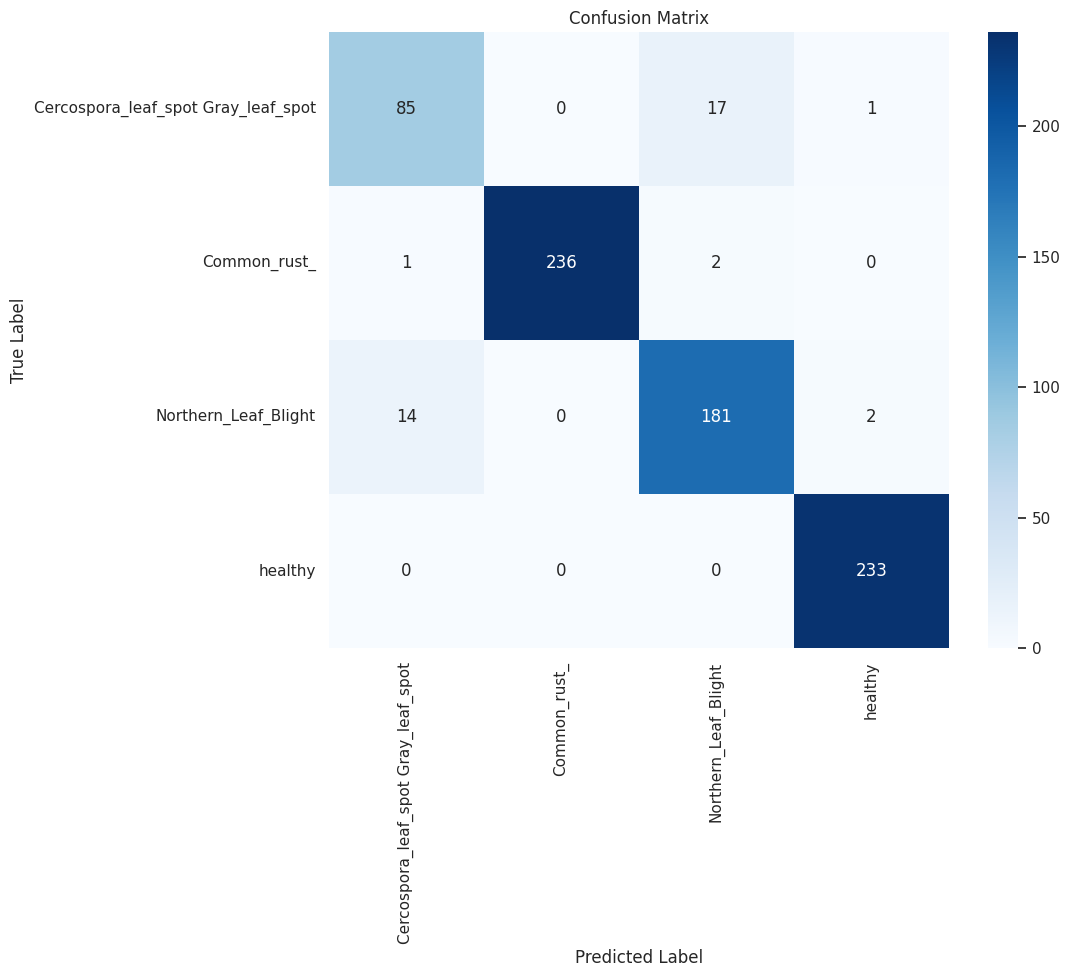


Model and necessary assets saved successfully in 'saved_models/MobileNet/Corn_(maize)'
		 Training Model: VGG16
Epoch 1/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 15s 136ms/step - accuracy: 0.5974 - loss: 1.0242 - val_accuracy: 0.8782 - val_loss: 0.4163
Epoch 2/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - accuracy: 0.8692 - loss: 0.3746 - val_accuracy: 0.8925 - val_loss: 0.2971
Epoch 3/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - accuracy: 0.8943 - loss: 0.2906 - val_accuracy: 0.9080 - val_loss: 0.2474
Epoch 4/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.9080 - loss: 0.2489 - val_accuracy: 0.9119 - val_loss: 0.2281
Epoch 5/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - accuracy: 0.9138 - loss: 0.2160 - val_accuracy: 0.9210 - val_loss: 0.2156
Epoch 6/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - accuracy: 0.9274 - loss: 0.1970 - val_accuracy: 0.9288 - val_loss: 0.1832
Epoch 7/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - accuracy: 0.9203 - loss: 0.2005 - val_accuracy: 0.9365 - val_loss: 0.1

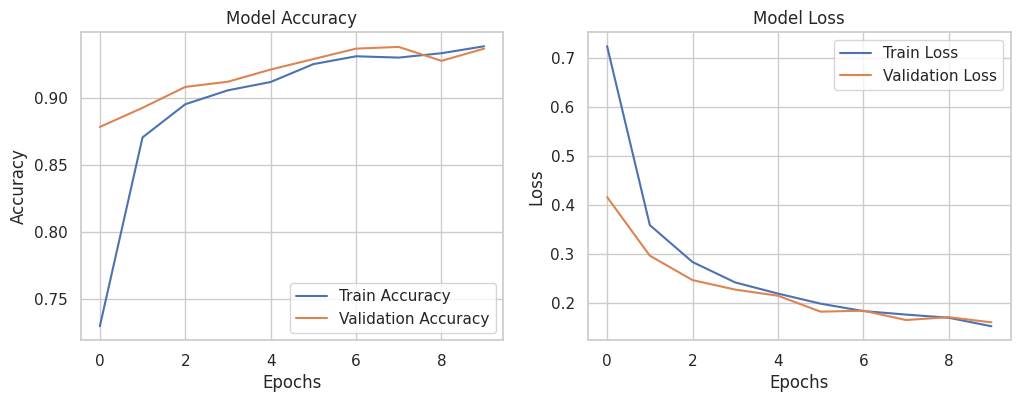

25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step

Model Evaluation Metrics:
Accuracy:  0.9365
Precision: 0.9368
Recall:    0.9365
F1 Score:  0.9336

Classification Report:

                                     precision    recall  f1-score   support

Cercospora_leaf_spot Gray_leaf_spot       0.91      0.66      0.76       103
                       Common_rust_       0.99      1.00      0.99       239
               Northern_Leaf_Blight       0.86      0.94      0.90       197
                            healthy       0.96      1.00      0.98       233

                           accuracy                           0.94       772
                          macro avg       0.93      0.90      0.91       772
                       weighted avg       0.94      0.94      0.93       772



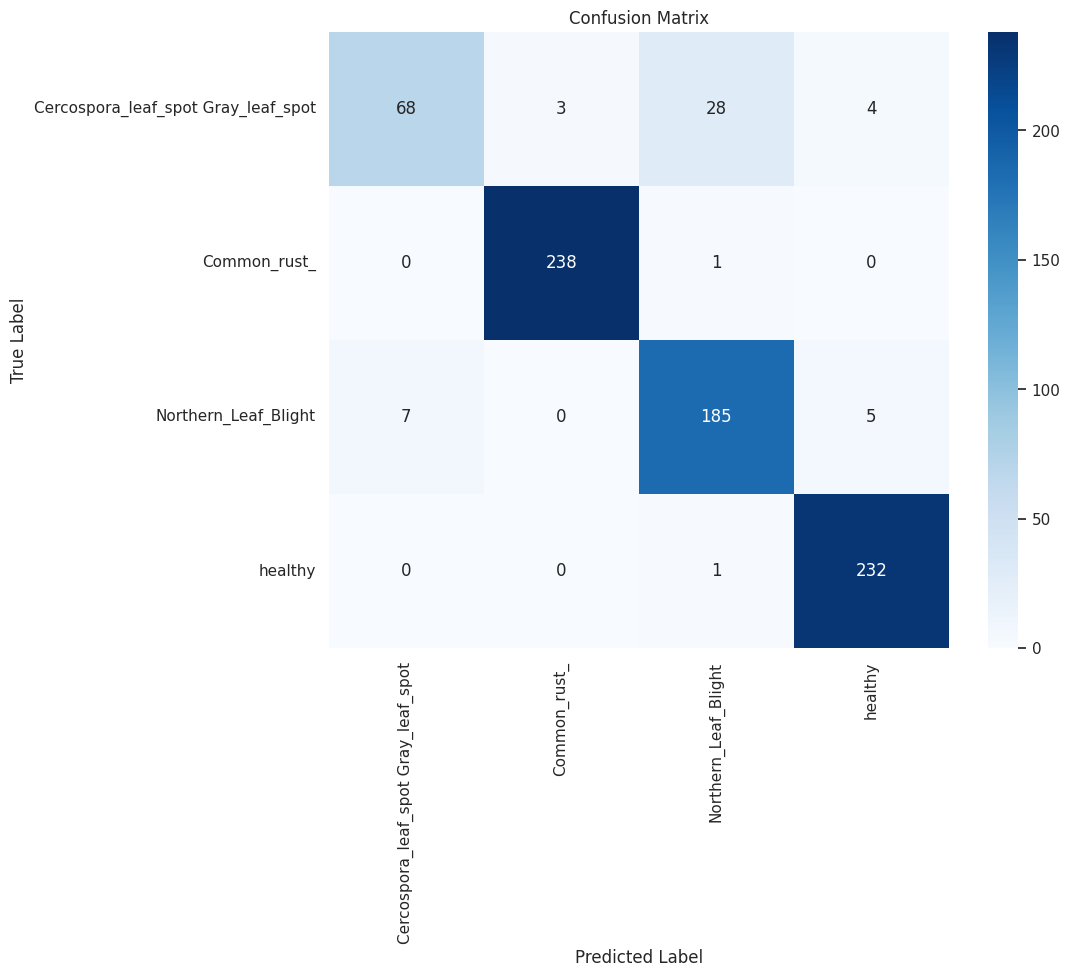


Model and necessary assets saved successfully in 'saved_models/VGG16/Corn_(maize)'
Processing plant: Grape

Processing plant: Grape

Label distribution for Grape:
Black_rot: 944 images
Esca_(Black_Measles): 1107 images
Leaf_blight_(Isariopsis_Leaf_Spot): 861 images
healthy: 339 images


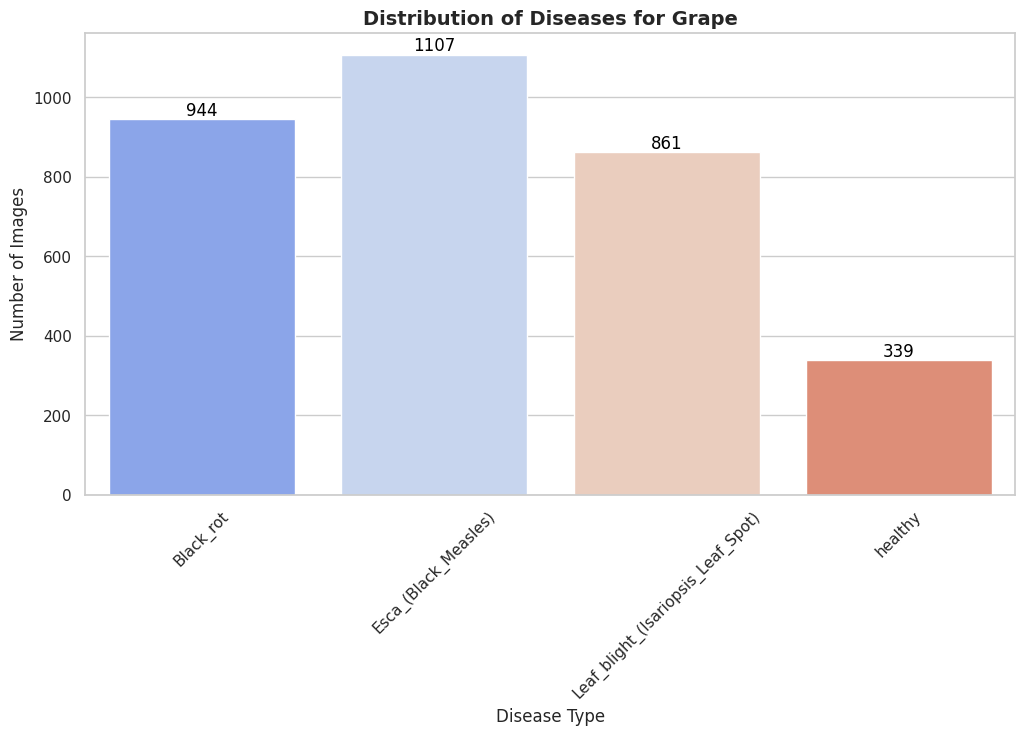

Mode selected for Grape: multi
		 Training Model: MobileNet
Epoch 1/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 16s 93ms/step - accuracy: 0.7924 - loss: 0.5434 - val_accuracy: 0.9334 - val_loss: 0.1503
Epoch 2/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9612 - loss: 0.1067 - val_accuracy: 0.9396 - val_loss: 0.1533
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9703 - loss: 0.0761 - val_accuracy: 0.9618 - val_loss: 0.1067
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9843 - loss: 0.0455 - val_accuracy: 0.9605 - val_loss: 0.1217
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9874 - loss: 0.0427 - val_accuracy: 0.9667 - val_loss: 0.1062
Epoch 6/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9873 - loss: 0.0303 - val_accuracy: 0.9667 - val_loss: 0.1070
Epoch 7/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9916 - loss: 0.0249 - val_accuracy: 0.9568 - val_loss: 0.1162
Epoch 8/10
102/102 ━━━━━━━━━━━━━━━━━

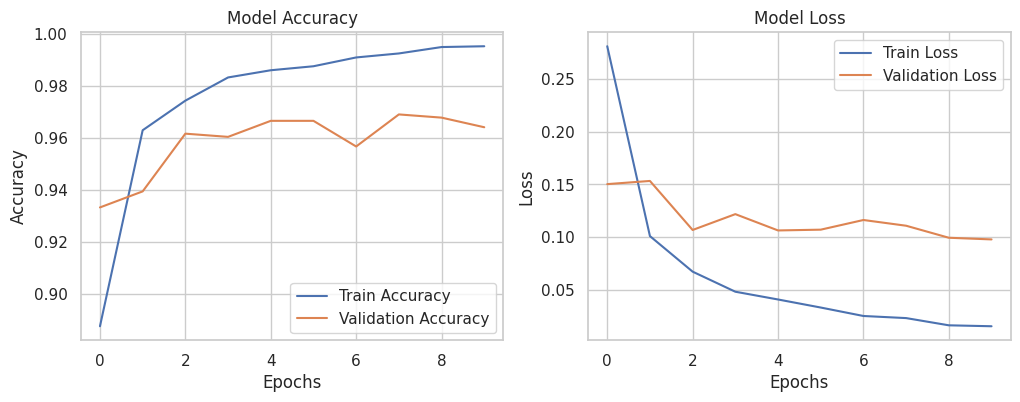

26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 151ms/step

Model Evaluation Metrics:
Accuracy:  0.9642
Precision: 0.9641
Recall:    0.9642
F1 Score:  0.9641

Classification Report:

                                    precision    recall  f1-score   support

                         Black_rot       0.95      0.92      0.94       236
              Esca_(Black_Measles)       0.95      0.96      0.95       276
Leaf_blight_(Isariopsis_Leaf_Spot)       0.99      1.00      1.00       215
                           healthy       0.99      1.00      0.99        84

                          accuracy                           0.96       811
                         macro avg       0.97      0.97      0.97       811
                      weighted avg       0.96      0.96      0.96       811



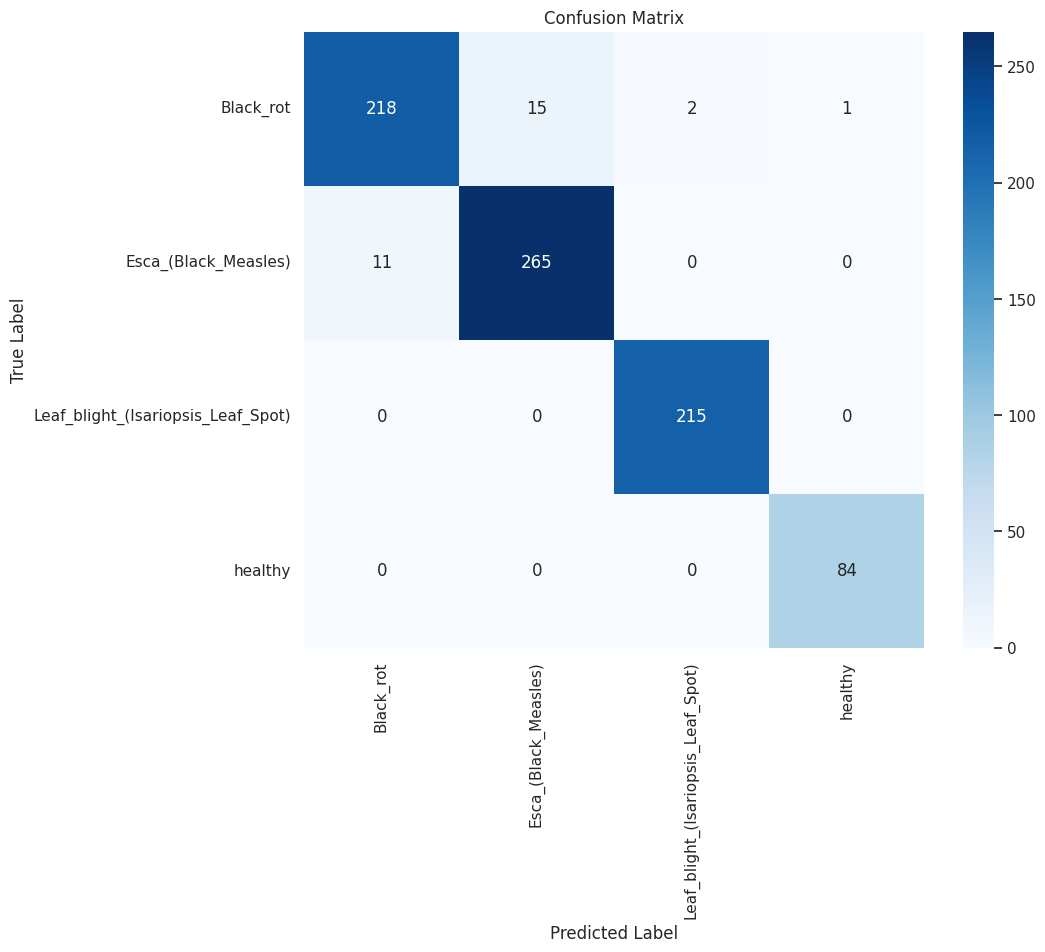


Model and necessary assets saved successfully in 'saved_models/MobileNet/Grape'
		 Training Model: VGG16
Epoch 1/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 15s 122ms/step - accuracy: 0.5192 - loss: 1.0816 - val_accuracy: 0.7916 - val_loss: 0.5660
Epoch 2/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.7791 - loss: 0.5587 - val_accuracy: 0.8286 - val_loss: 0.4437
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.8093 - loss: 0.4455 - val_accuracy: 0.8718 - val_loss: 0.3598
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.8356 - loss: 0.4016 - val_accuracy: 0.8742 - val_loss: 0.3273
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.8532 - loss: 0.3580 - val_accuracy: 0.8816 - val_loss: 0.2994
Epoch 6/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - accuracy: 0.8610 - loss: 0.3282 - val_accuracy: 0.8619 - val_loss: 0.3130
Epoch 7/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - accuracy: 0.8647 - loss: 0.3179 - val_accuracy: 0.8915 - val_lo

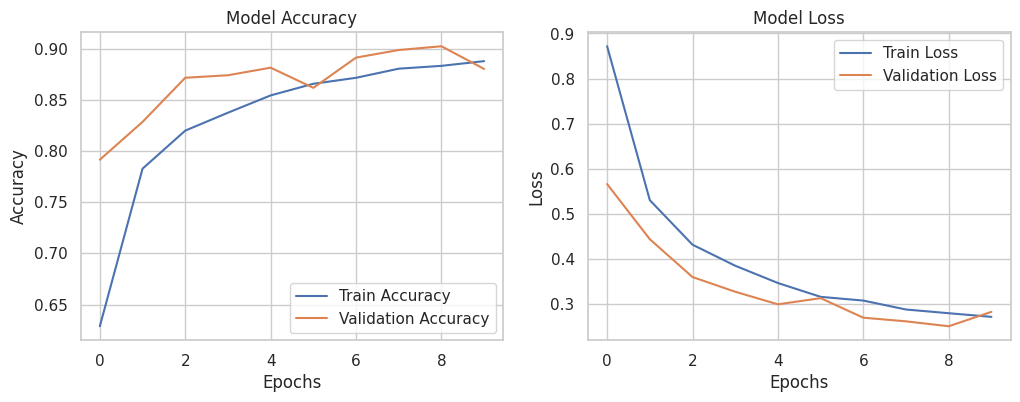

26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step

Model Evaluation Metrics:
Accuracy:  0.8804
Precision: 0.8934
Recall:    0.8804
F1 Score:  0.8761

Classification Report:

                                    precision    recall  f1-score   support

                         Black_rot       0.93      0.65      0.77       236
              Esca_(Black_Measles)       0.77      0.95      0.85       276
Leaf_blight_(Isariopsis_Leaf_Spot)       0.98      1.00      0.99       215
                           healthy       0.97      1.00      0.98        84

                          accuracy                           0.88       811
                         macro avg       0.91      0.90      0.90       811
                      weighted avg       0.89      0.88      0.88       811



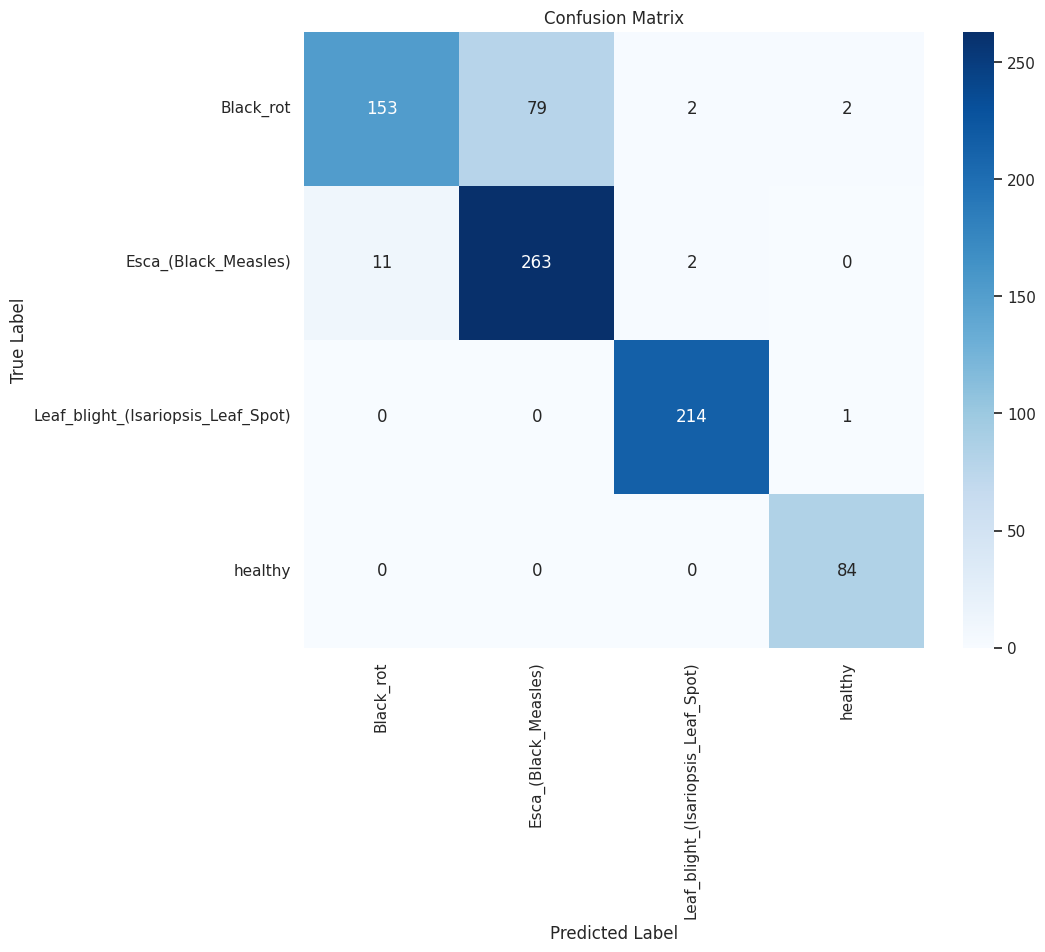


Model and necessary assets saved successfully in 'saved_models/VGG16/Grape'
Processing plant: Cherry_(including_sour)

Processing plant: Cherry_(including_sour)

Label distribution for Cherry_(including_sour):
Powdery_mildew: 842 images
healthy: 684 images


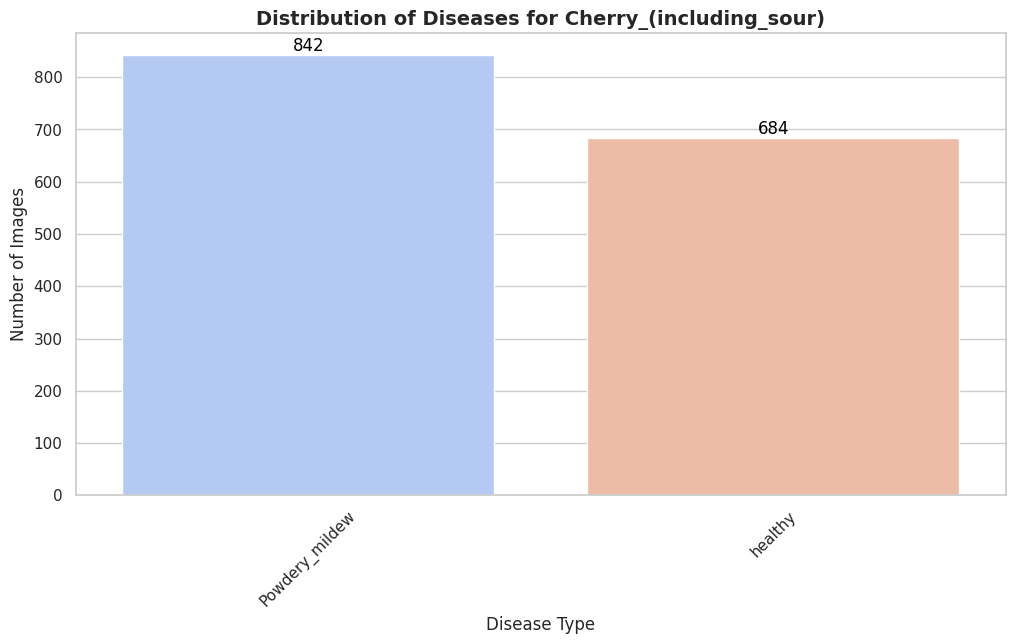

Mode selected for Cherry_(including_sour): binary
		 Training Model: MobileNet
Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 15s 183ms/step - accuracy: 0.9438 - loss: 0.1344 - val_accuracy: 0.9947 - val_loss: 0.0111
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 8.3066e-04
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 1.0000 - loss: 5.3233e-04 - val_accuracy: 1.0000 - val_loss: 2.1717e-04
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 1.0000 - loss: 1.5797e-04 - val_accuracy: 1.0000 - val_loss: 1.2220e-04
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 1.0000 - loss: 2.1276e-04 - val_accuracy: 1.0000 - val_loss: 8.6965e-05
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 1.0000 - loss: 1.6176e-04 - val_accuracy: 1.0000 - val_loss: 1.0845e-04
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 1.0000 - loss: 9.8333e-05 - val_accuracy: 1.0000 - val_los

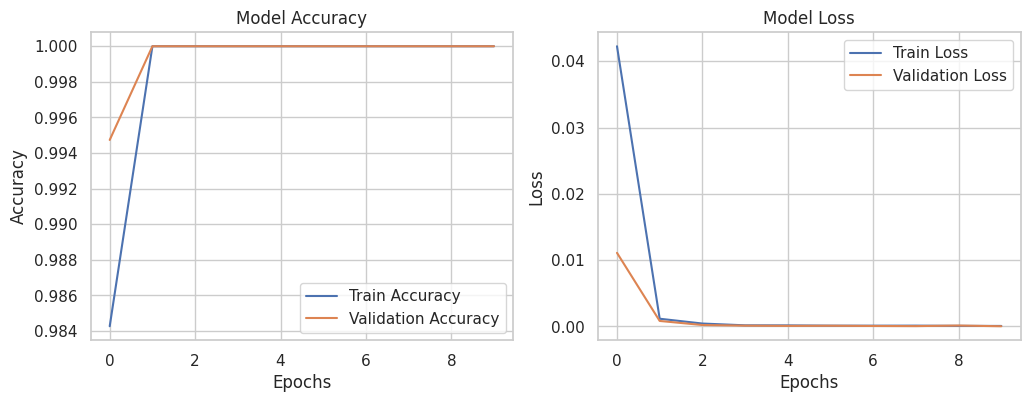

12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 262ms/step

Model Evaluation Metrics:
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1 Score:  1.0000

Classification Report:

                precision    recall  f1-score   support

Powdery_mildew       1.00      1.00      1.00       210
       healthy       1.00      1.00      1.00       170

      accuracy                           1.00       380
     macro avg       1.00      1.00      1.00       380
  weighted avg       1.00      1.00      1.00       380



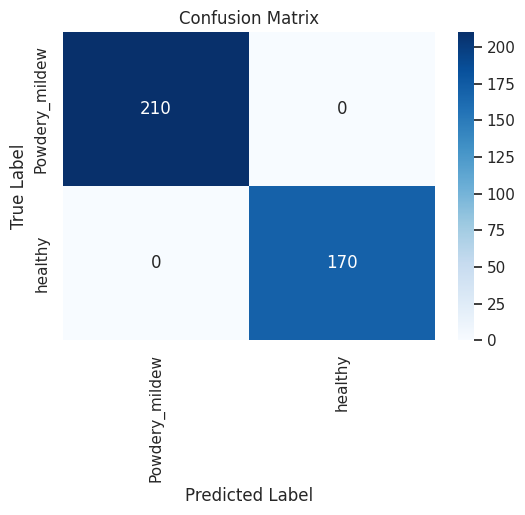


Model and necessary assets saved successfully in 'saved_models/MobileNet/Cherry_(including_sour)'
		 Training Model: VGG16
Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 12s 210ms/step - accuracy: 0.8304 - loss: 0.4324 - val_accuracy: 0.9816 - val_loss: 0.1107
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.9826 - loss: 0.0978 - val_accuracy: 0.9947 - val_loss: 0.0433
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.9937 - loss: 0.0438 - val_accuracy: 1.0000 - val_loss: 0.0235
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.9977 - loss: 0.0255 - val_accuracy: 1.0000 - val_loss: 0.0153
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.9989 - loss: 0.0203 - val_accuracy: 1.0000 - val_loss: 0.0123
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.9973 - loss: 0.0163 - val_accuracy: 1.0000 - val_loss: 0.0086
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.9978 - loss: 0.0170 - val_accuracy: 1.0000 - va

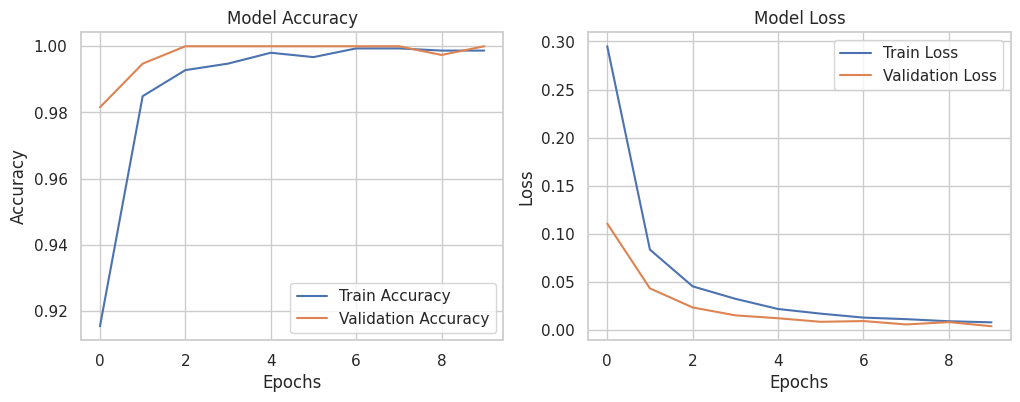

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step

Model Evaluation Metrics:
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1 Score:  1.0000

Classification Report:

                precision    recall  f1-score   support

Powdery_mildew       1.00      1.00      1.00       210
       healthy       1.00      1.00      1.00       170

      accuracy                           1.00       380
     macro avg       1.00      1.00      1.00       380
  weighted avg       1.00      1.00      1.00       380



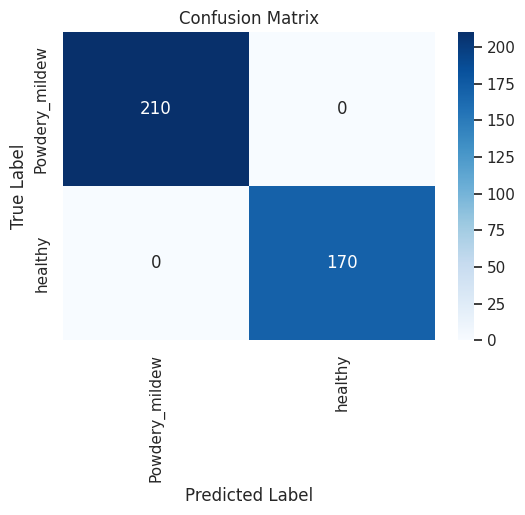


Model and necessary assets saved successfully in 'saved_models/VGG16/Cherry_(including_sour)'
Processing plant: Apple

Processing plant: Apple

Label distribution for Apple:
Apple_scab: 504 images
Black_rot: 496 images
Cedar_apple_rust: 220 images
healthy: 1316 images


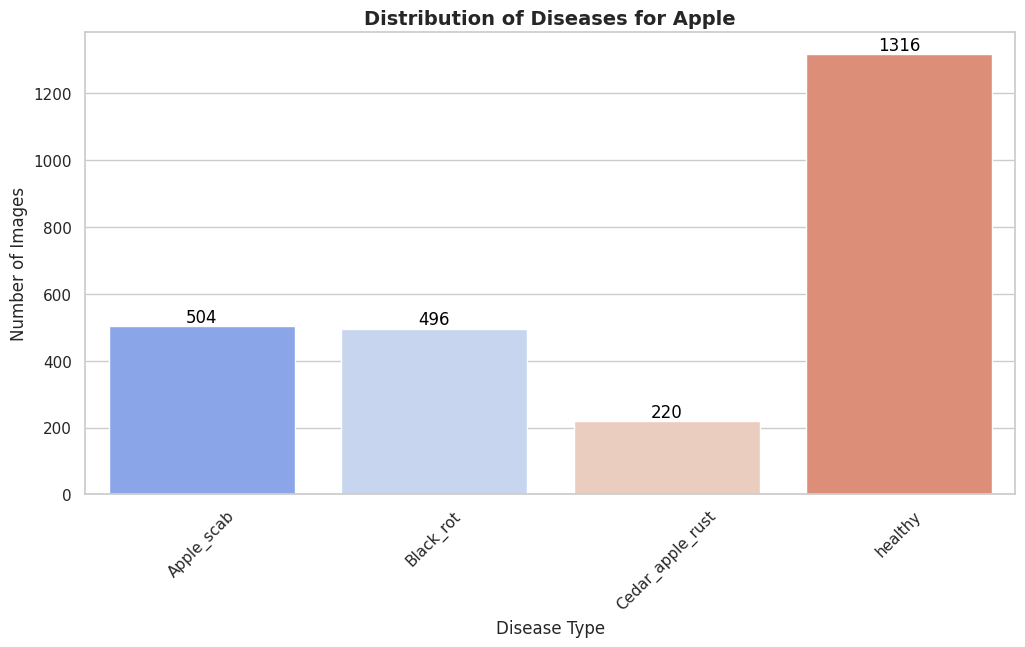

Mode selected for Apple: multi
		 Training Model: MobileNet
Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 16s 113ms/step - accuracy: 0.7752 - loss: 0.6391 - val_accuracy: 0.9669 - val_loss: 0.0882
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9670 - loss: 0.0891 - val_accuracy: 0.9811 - val_loss: 0.0549
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9836 - loss: 0.0578 - val_accuracy: 0.9858 - val_loss: 0.0470
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9864 - loss: 0.0389 - val_accuracy: 0.9890 - val_loss: 0.0379
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9908 - loss: 0.0262 - val_accuracy: 0.9827 - val_loss: 0.0594
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9940 - loss: 0.0223 - val_accuracy: 0.9858 - val_loss: 0.0352
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9988 - loss: 0.0130 - val_accuracy: 0.9874 - val_loss: 0.0327
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/ste

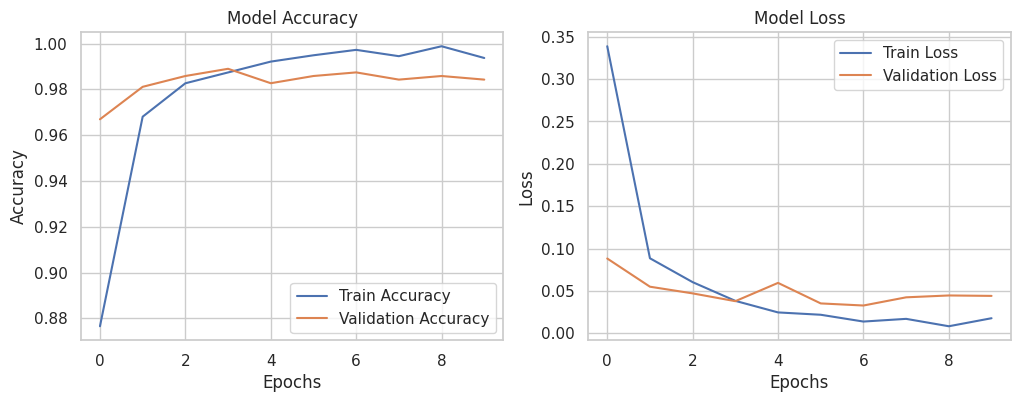

20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 153ms/step

Model Evaluation Metrics:
Accuracy:  0.9843
Precision: 0.9845
Recall:    0.9843
F1 Score:  0.9843

Classification Report:

                  precision    recall  f1-score   support

      Apple_scab       0.95      0.98      0.96       126
       Black_rot       0.98      0.98      0.98       125
Cedar_apple_rust       1.00      0.98      0.99        55
         healthy       0.99      0.99      0.99       329

        accuracy                           0.98       635
       macro avg       0.98      0.98      0.98       635
    weighted avg       0.98      0.98      0.98       635



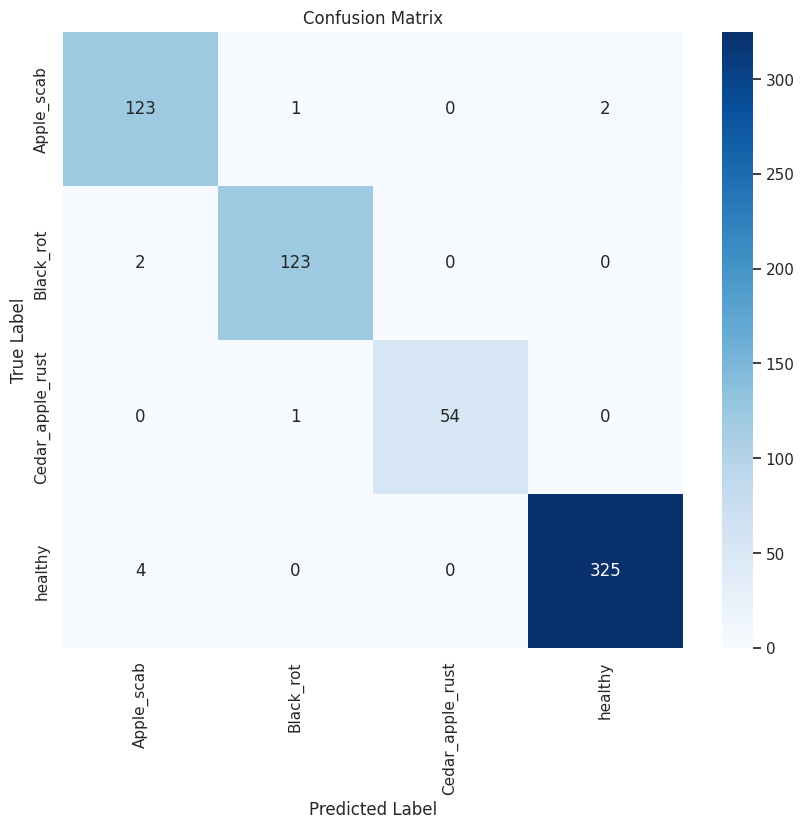


Model and necessary assets saved successfully in 'saved_models/MobileNet/Apple'
		 Training Model: VGG16
Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 15s 164ms/step - accuracy: 0.5856 - loss: 1.0821 - val_accuracy: 0.8268 - val_loss: 0.5307
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.8365 - loss: 0.5063 - val_accuracy: 0.9008 - val_loss: 0.3380
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.8795 - loss: 0.3520 - val_accuracy: 0.9165 - val_loss: 0.2790
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.9148 - loss: 0.2693 - val_accuracy: 0.9276 - val_loss: 0.2165
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - accuracy: 0.9312 - loss: 0.2167 - val_accuracy: 0.9433 - val_loss: 0.1963
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - accuracy: 0.9352 - loss: 0.1904 - val_accuracy: 0.9433 - val_loss: 0.1742
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - accuracy: 0.9389 - loss: 0.1670 - val_accuracy: 0.9496 - val_loss: 0.1636
Epo

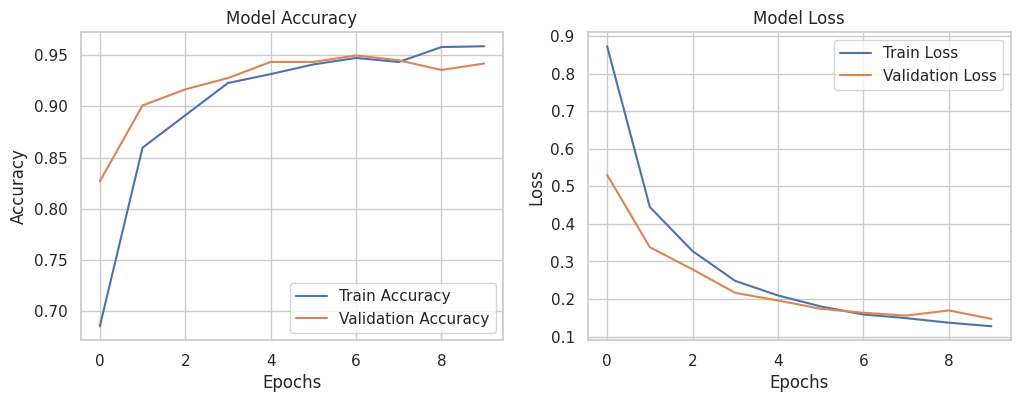

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step

Model Evaluation Metrics:
Accuracy:  0.9417
Precision: 0.9418
Recall:    0.9417
F1 Score:  0.9411

Classification Report:

                  precision    recall  f1-score   support

      Apple_scab       0.94      0.86      0.90       126
       Black_rot       0.92      0.98      0.95       125
Cedar_apple_rust       0.94      0.89      0.92        55
         healthy       0.95      0.97      0.96       329

        accuracy                           0.94       635
       macro avg       0.94      0.92      0.93       635
    weighted avg       0.94      0.94      0.94       635



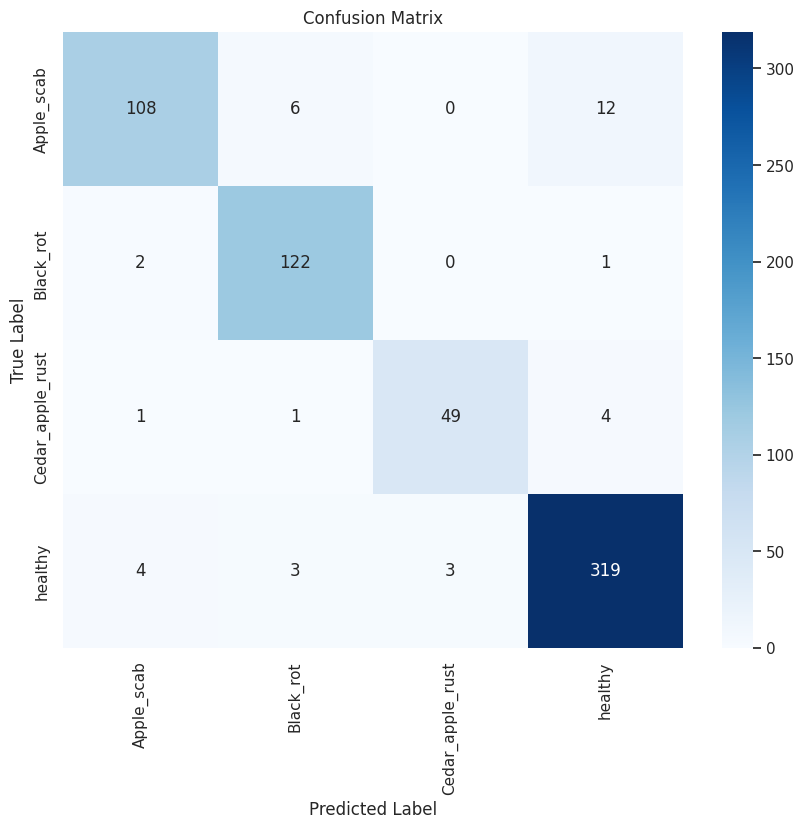


Model and necessary assets saved successfully in 'saved_models/VGG16/Apple'


In [ ]:
# Get the list of all distinct plant types in the DataFrame
unique_plants = data_info["Plant"].unique()

# Loop over each plant type and run the full pipeline
for plant in unique_plants:
    # Print a visual separator to distinguish output blocks
    print("=" * 100)
    # Indicate which plant is about to be processed
    print(f"Processing plant: {plant}")
    # Print another separator for clarity
    print("=" * 100)

    # Execute the function that handles:
    # 1. Loading train/validation images for this plant
    # 2. Visualizing label distribution
    # 3. Choosing binary vs. multi-class mode
    # 4. Encoding labels
    # 5. Training and evaluating two transfer-learning models
    # 6. Saving each trained model and its assets
    process_and_train_plant(
        plant,
        dataset_path="dataset",   # root folder containing train/val subfolders
        img_size=(128, 128),      # resize images to 128×128 pixels
        epochs=10,                # train for 10 epochs
        batch_size=32             # use batches of 32 images
    )